In [11]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# import matplotlib as mpl

# # Option A — use built-in Computer Modern for math and set serif family (no full LaTeX needed)
# mpl.rcParams.update({
#     "font.family": "serif",
#     "font.serif": ["Latin Modern Roman", "Computer Modern Roman", "Times New Roman"],
#     "mathtext.fontset": "cm",    # use Computer Modern for mathtext
#     "axes.titlesize": 14,
#     "axes.labelsize": 13,
#     "xtick.labelsize": 11,
#     "ytick.labelsize": 11,
# })

### For Testing Accuracies

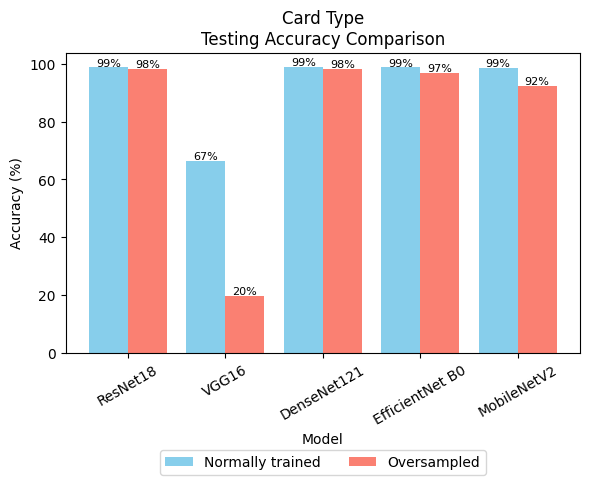

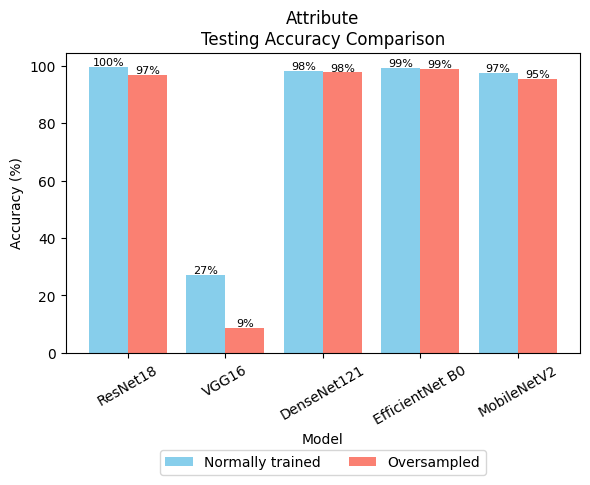

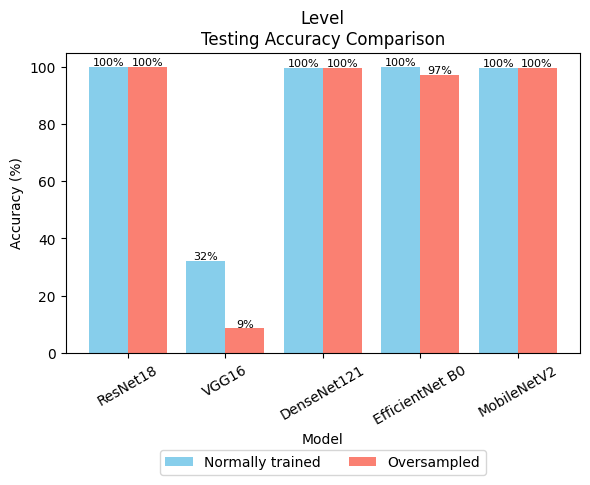

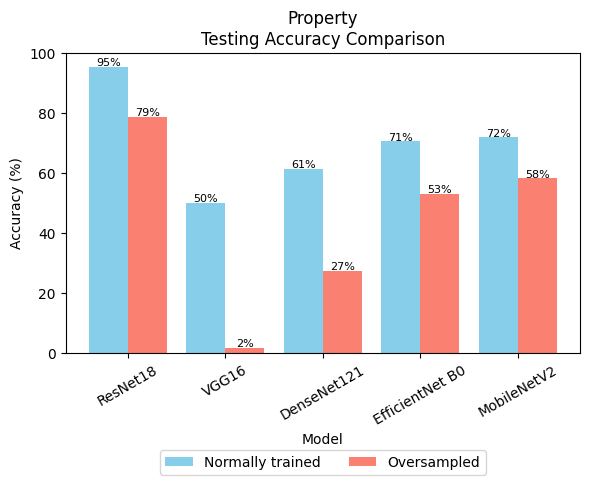

In [13]:
with open("normal_results/test_accuracies_normal.json", "r") as file:
    test_accuracies_normal = json.load(file)

with open("oversample_results/test_accuracies_oversample.json", "r") as file:
    test_accuracies_oversample = json.load(file)

models_nice = ["ResNet18", "VGG16", "DenseNet121", "EfficientNet B0", "MobileNetV2"]

for feature in ["_CardCategory", "_Attribute", "_Level", "_Property"]:
    filtered1 = {k: v for k, v in test_accuracies_normal.items() if k.endswith(feature)}
    filtered2 = {k: v for k, v in test_accuracies_oversample.items() if k.endswith(feature)}

    labels = [k.replace(feature, "") for k in filtered1.keys()]

    values1 = list(filtered1.values())
    values2 = list(filtered2.values())

    x = np.arange(len(labels))
    width = 0.4

    fig, ax = plt.subplots(figsize=(6, 5))

    ax.bar(x - width/2, values1, width, label="Normally trained", color="skyblue")
    ax.bar(x + width/2, values2, width, label="Oversampled", color="salmon")

    ax.set_xlabel("Model")
    ax.set_ylabel("Accuracy (%)")
    if feature == "_CardCategory":
        feature = " Card Type"
    ax.set_title(f"{feature[1:]}\nTesting Accuracy Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(models_nice, rotation=30)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)
    plt.subplots_adjust(bottom=0.25)

    for i, v in enumerate(values1):
        plt.text(i - width/2, v + 0.5, f"{v:.0f}%", ha='center', fontsize=8)
    for i, v in enumerate(values2):
        plt.text(i + width/2, v + 0.5, f"{v:.0f}%", ha='center', fontsize=8)

    plt.tight_layout()
    plt.savefig(f'figs/{feature[1:]}_testing_accuracy.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/{feature[1:]}_testing_accuracy.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### For Testing Losses

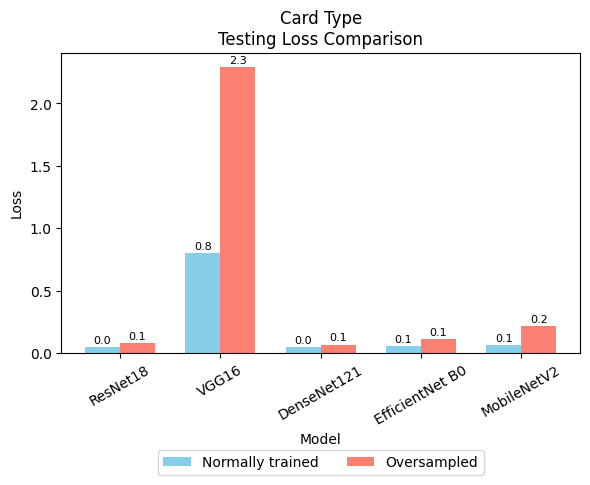

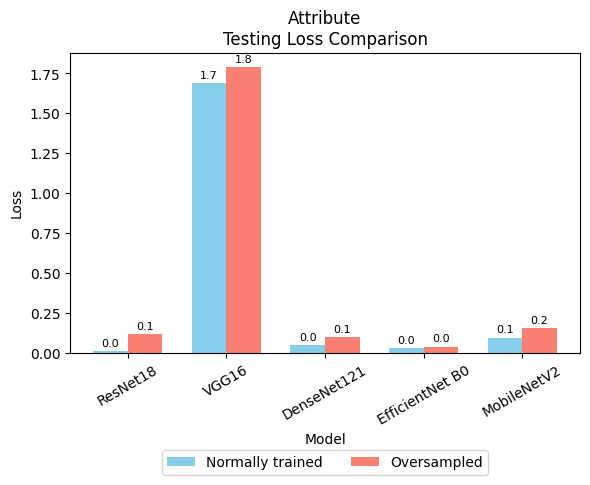

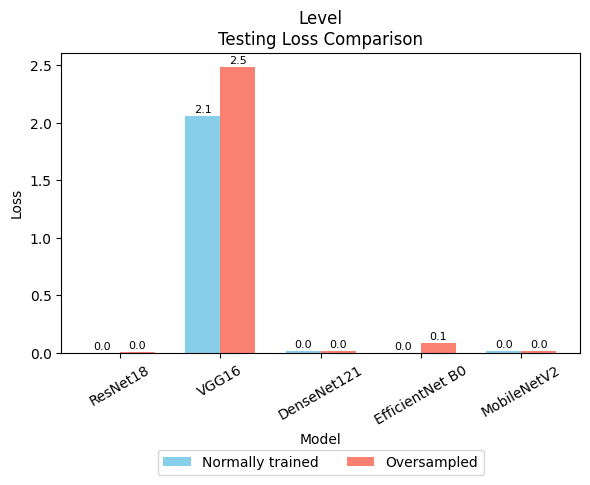

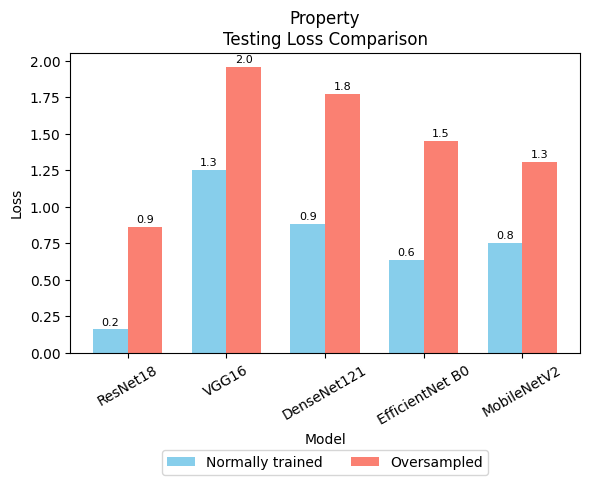

In [14]:
with open("normal_results/test_losses_normal.json", "r") as file:
    test_losses_normal = json.load(file)

with open("oversample_results/test_losses_oversample.json", "r") as file:
    test_losses_oversample = json.load(file)

models_nice = ["ResNet18", "VGG16", "DenseNet121", "EfficientNet B0", "MobileNetV2"]

for feature in ["_CardCategory", "_Attribute", "_Level", "_Property"]:
    filtered1 = {k: v for k, v in test_losses_normal.items() if k.endswith(feature)}
    filtered2 = {k: v for k, v in test_losses_oversample.items() if k.endswith(feature)}

    labels = [k.replace(feature, "") for k in filtered1.keys()]

    values1 = list(filtered1.values())
    values2 = list(filtered2.values())

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 5))


    ax.bar(x - width/2, values1, width, label="Normally trained", color="skyblue")
    ax.bar(x + width/2, values2, width, label="Oversampled", color="salmon")
    ax.set_xlabel("Model")
    ax.set_ylabel("Loss")
    if feature == "_CardCategory":
        feature = " Card Type"
    ax.set_title(f"{feature[1:]}\nTesting Loss Comparison")
    ax.set_xticks(x)
    ax.set_xticklabels(models_nice, rotation=30)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=2)
    plt.subplots_adjust(bottom=0.25)

    for i, v in enumerate(values1):
        ax.text(i - width/2, v + 0.03, f"{v:.1f}", ha='center', fontsize=8)
    for i, v in enumerate(values2):
        ax.text(i + width/2, v + 0.03, f"{v:.1f}", ha='center', fontsize=8)

    plt.tight_layout()
    plt.savefig(f'figs/{feature[1:]}_testing_loss.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/{feature[1:]}_testing_loss.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### For Training Accuracies

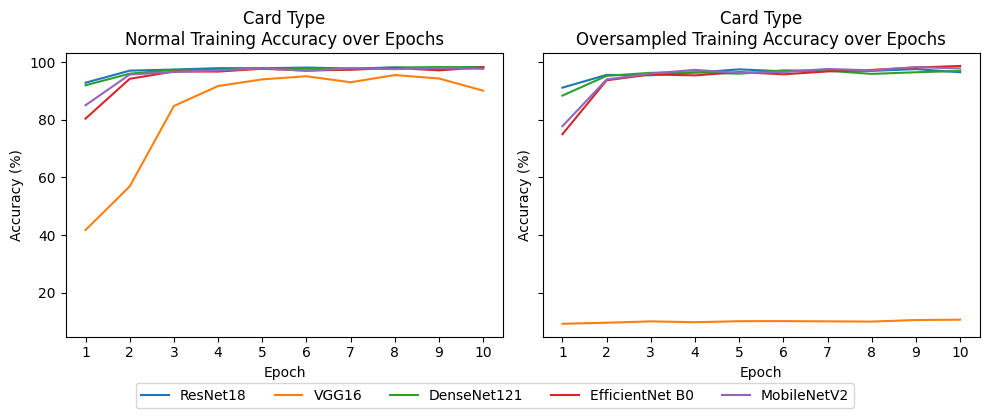

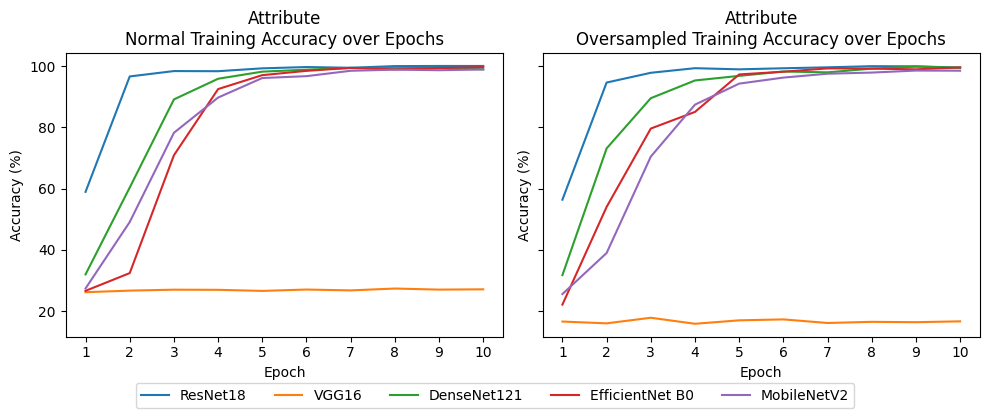

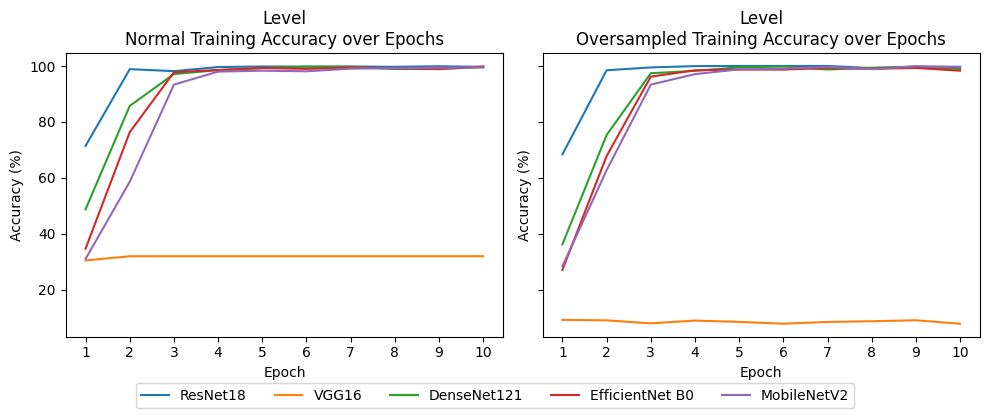

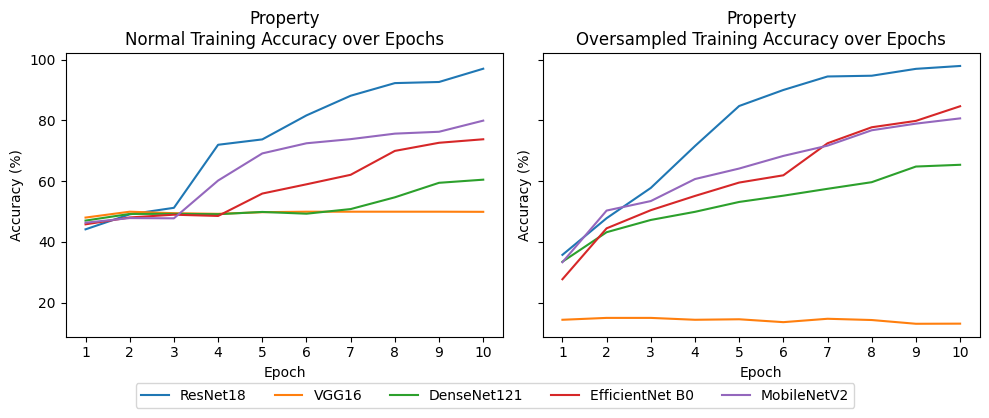

In [15]:
with open("normal_results/training_accuracies_normal.json", "r") as file:
    training_accuracies_normal = json.load(file)

with open("oversample_results/training_accuracies_oversample.json", "r") as file:
    training_accuracies_oversample = json.load(file)

epochs = range(1, 11)

models_nice2 = {"resnet18": "ResNet18", "vgg16": "VGG16", "densenet121": "DenseNet121", "efficientnet_b0": "EfficientNet B0", "mobilenet_v2": "MobileNetV2"}

for feature in ["_CardCategory", "_Attribute", "_Level", "_Property"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    for model in ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]:
        axes[0].plot(epochs, training_accuracies_normal[f"{model}{feature}"], label=models_nice2[model])
        axes[1].plot(epochs, training_accuracies_oversample[f"{model}{feature}"], label=models_nice2[model])

    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Accuracy (%)")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy (%)")
    axes[0].set_xticks(list(epochs))
    axes[1].set_xticks(list(epochs))
    if feature == "_CardCategory":
        feature = " Card Type"
    axes[0].set_title(f"{feature[1:]}\nNormal Training Accuracy over Epochs")
    #axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
    axes[1].set_title(f"{feature[1:]}\nOversampled Training Accuracy over Epochs")
    #axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)

    fig.legend(labels=list(models_nice2.values()),
               loc="lower center",
               bbox_to_anchor=(0.5, -0.05),
               bbox_transform=fig.transFigure,
               ncol=5)
    plt.tight_layout()
    plt.savefig(f'figs/{feature[1:]}_training_accuracy.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/{feature[1:]}_training_accuracy.pdf', dpi=300, bbox_inches='tight')
    plt.show()


### For Training Losses

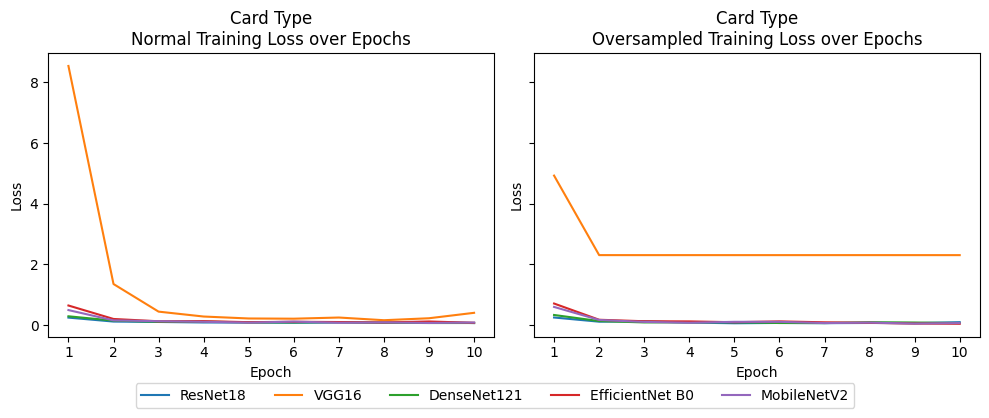

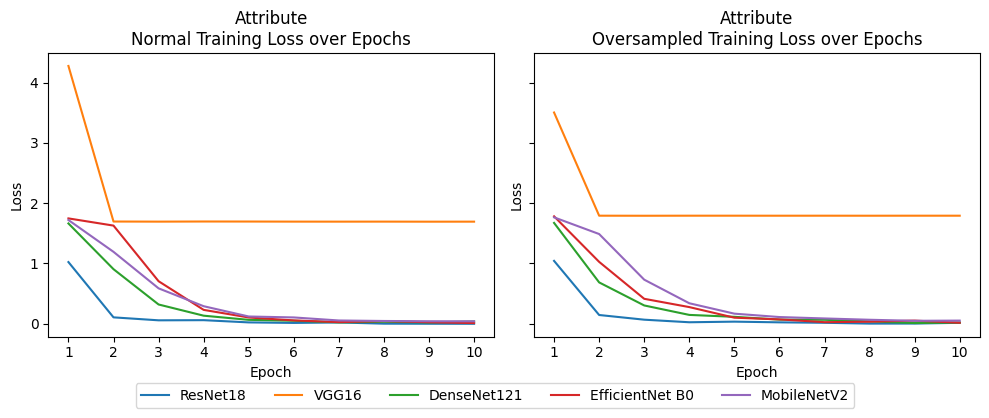

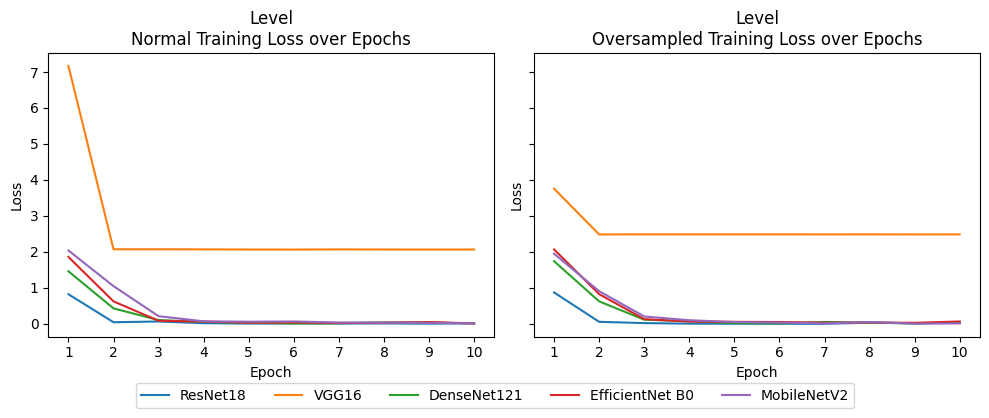

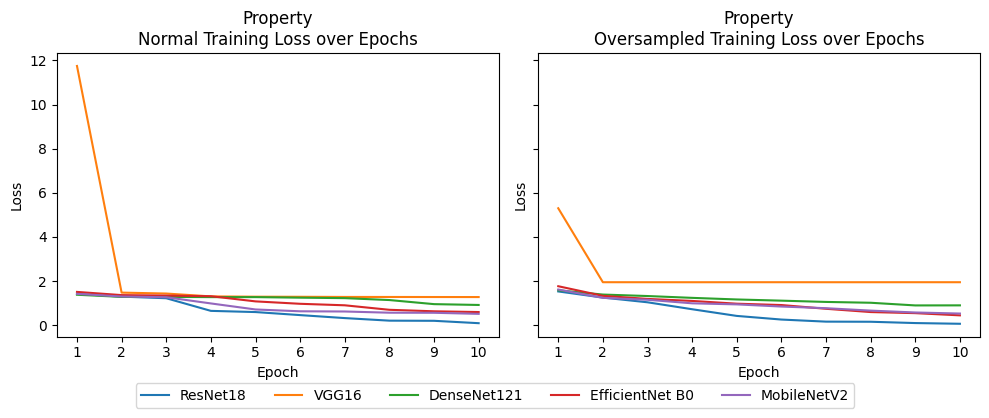

In [16]:
with open("normal_results/training_losses_normal.json", "r") as file:
    training_losses_normal = json.load(file)

with open("oversample_results/training_losses_oversample.json", "r") as file:
    training_losses_oversample = json.load(file)

epochs = range(1, 11)

models_nice2 = {"resnet18": "ResNet18", "vgg16": "VGG16", "densenet121": "DenseNet121", "efficientnet_b0": "EfficientNet B0", "mobilenet_v2": "MobileNetV2"}

for feature in ["_CardCategory", "_Attribute", "_Level", "_Property"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
    for model in ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]:
        axes[0].plot(epochs, training_losses_normal[f"{model}{feature}"], label=model)
        axes[1].plot(epochs, training_losses_oversample[f"{model}{feature}"], label=model)

    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Loss")
    axes[0].set_xticks(list(epochs))
    axes[1].set_xticks(list(epochs))
    if feature == "_CardCategory":
        feature = " Card Type"
    axes[0].set_title(f"{feature[1:]}\nNormal Training Loss over Epochs")
    #axes[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
    axes[1].set_title(f"{feature[1:]}\nOversampled Training Loss over Epochs")
    #axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3)
    fig.legend(labels=list(models_nice2.values()),
               loc="lower center",
               bbox_to_anchor=(0.5, -0.05),
               bbox_transform=fig.transFigure,
               ncol=5)
    plt.tight_layout()
    plt.savefig(f'figs/{feature[1:]}_training_loss.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/{feature[1:]}_training_loss.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### Normal Percentages per Model per Class in Testing

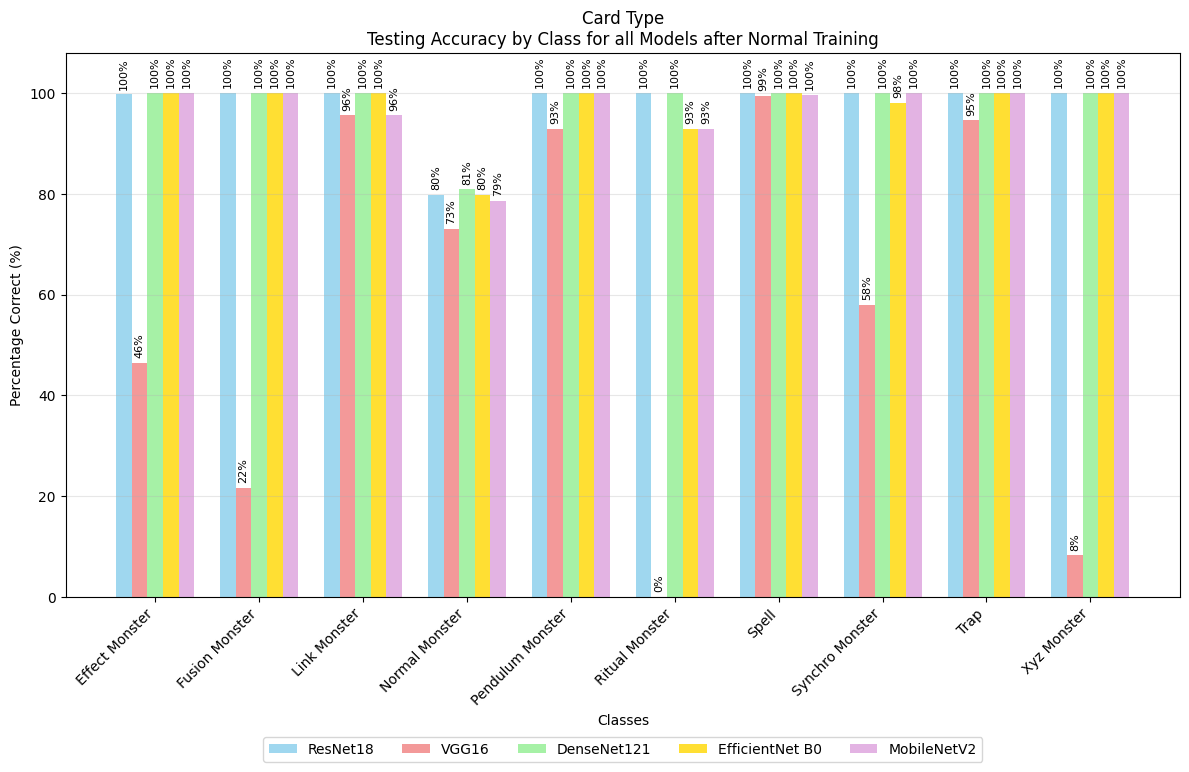

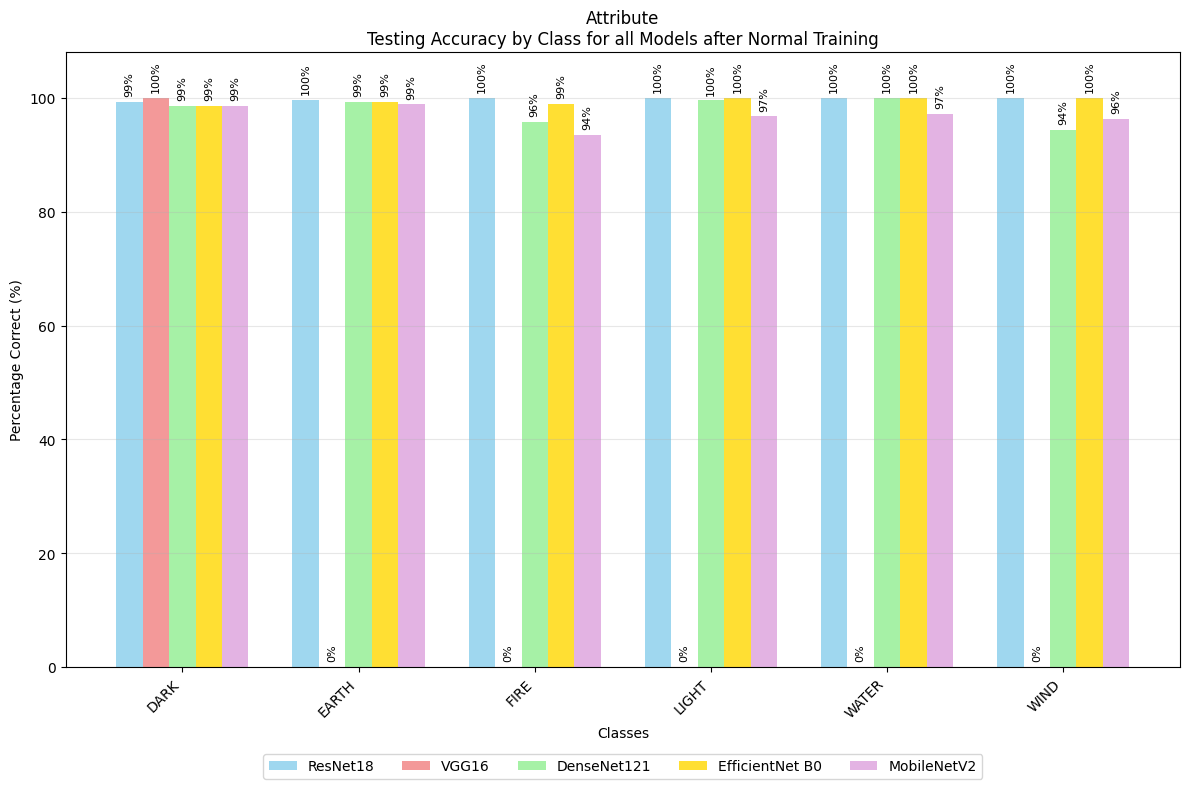

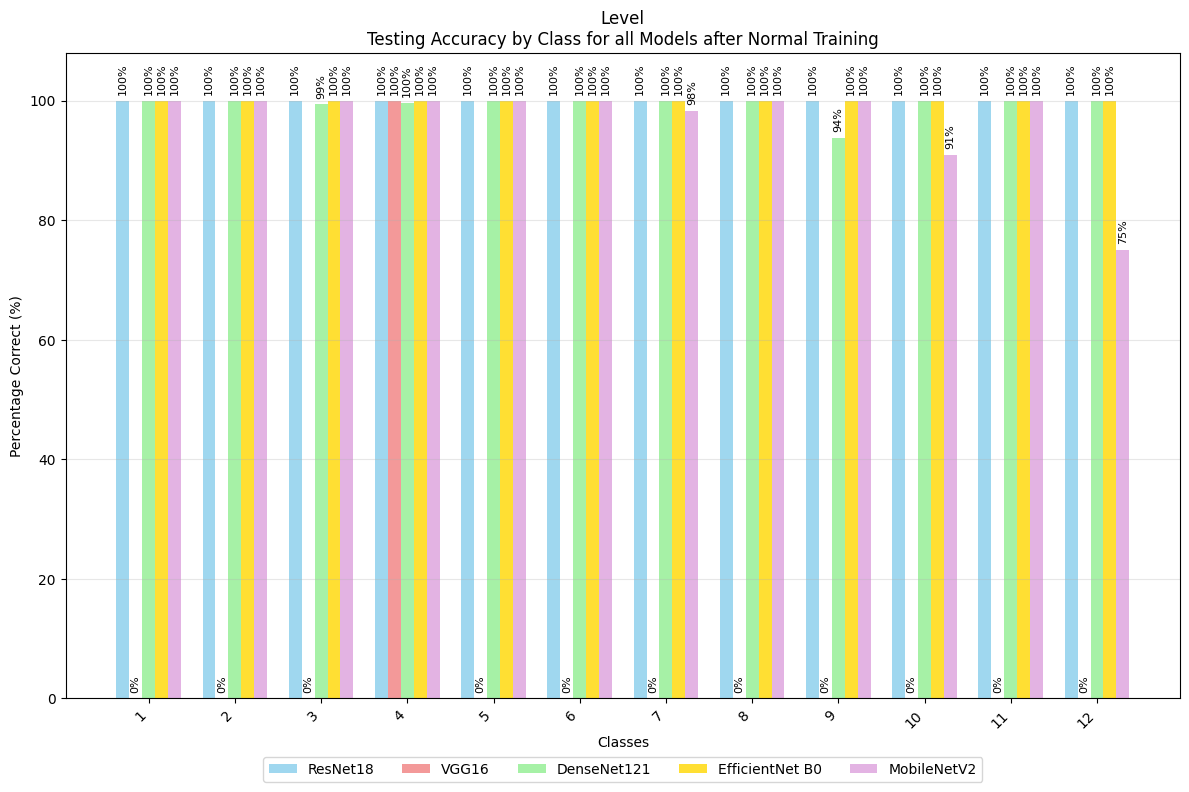

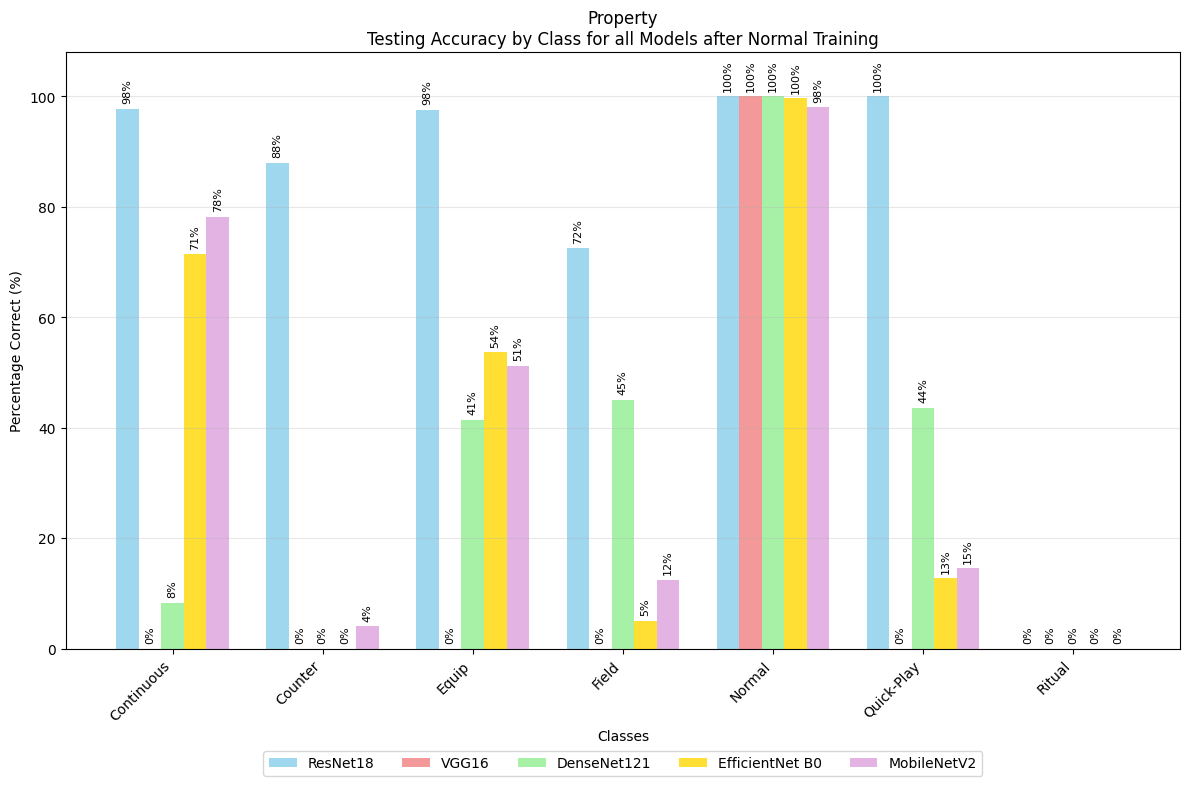

In [17]:
# Load the data for correct predictions and total samples
with open("normal_results/all_classes_correct_normal.json", "r") as file:
    all_classes_correct = json.load(file)

with open("normal_results/all_classes_total_normal.json", "r") as file:
    all_classes_total = json.load(file)

with open("normal_results/all_classes_normal.json", "r") as file:
    all_classes_names = json.load(file)

models_nice2 = {"resnet18": "ResNet18", "vgg16": "VGG16", "densenet121": "DenseNet121", "efficientnet_b0": "EfficientNet B0", "mobilenet_v2": "MobileNetV2"}

# Define the features and models
features = ["_CardCategory", "_Attribute", "_Level", "_Property"]
models = ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]
legend_offsets = {"_CardCategory": -0.245, "_Attribute": -0.13, "_Level": -0.08, "_Property": -0.16}

# Create bar graphs for each feature
for feature in features:
    # Get class names for this feature
    class_names = all_classes_names[f"resnet18{feature}"]

    if feature == "_Level":
        for i in range(len(class_names)):
            class_names[i] = str(class_names[i])[:-2]
    
    # Calculate percentages for each model and class
    percentages = {}
    for model in models:
        correct = all_classes_correct[f"{model}{feature}"]
        total = all_classes_total[f"{model}{feature}"]
        percentages[model] = [(c/t)*100 if t > 0 else 0 for c, t in zip(correct, total)]
    
    # Create the bar graph
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.arange(len(class_names))
    width = 0.15
    
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']
    
    for i, model in enumerate(models):
        bars = ax.bar(x + i*width, percentages[model], width, 
                     label=models_nice2[model], color=colors[i], alpha=0.8)
        
        # Add percentage labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
    ax.set_xlabel('Classes')
    ax.set_ylabel('Percentage Correct (%)')
    
    # Format feature name for title
    title_feature = feature
    if feature == "_CardCategory":
        title_feature = " Card Type"

    ax.set_title(f'{title_feature[1:]}\nTesting Accuracy by Class for all Models after Normal Training')
    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, legend_offsets[feature]), ncol=5)
    ax.set_ylim(0, 108)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'figs/per_class/{feature[1:]}_normal.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/per_class/{feature[1:]}_normal.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### Oversample Percentages per Model per Class in Testing

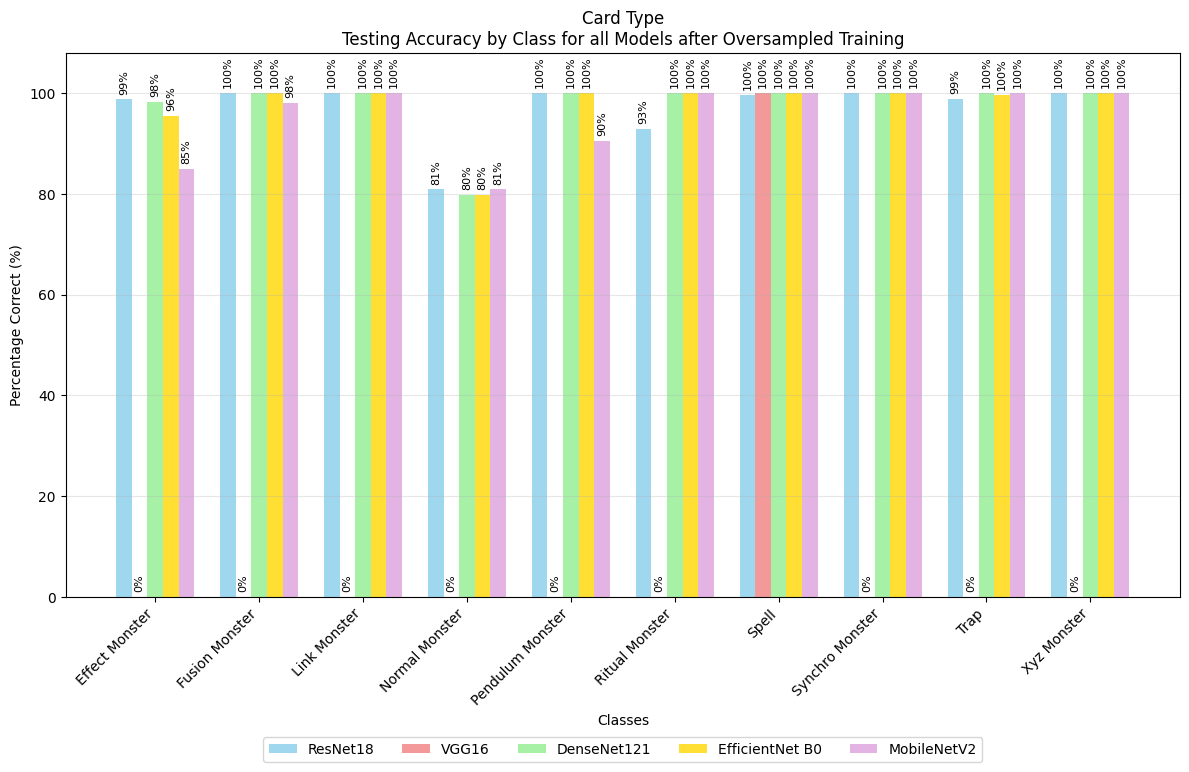

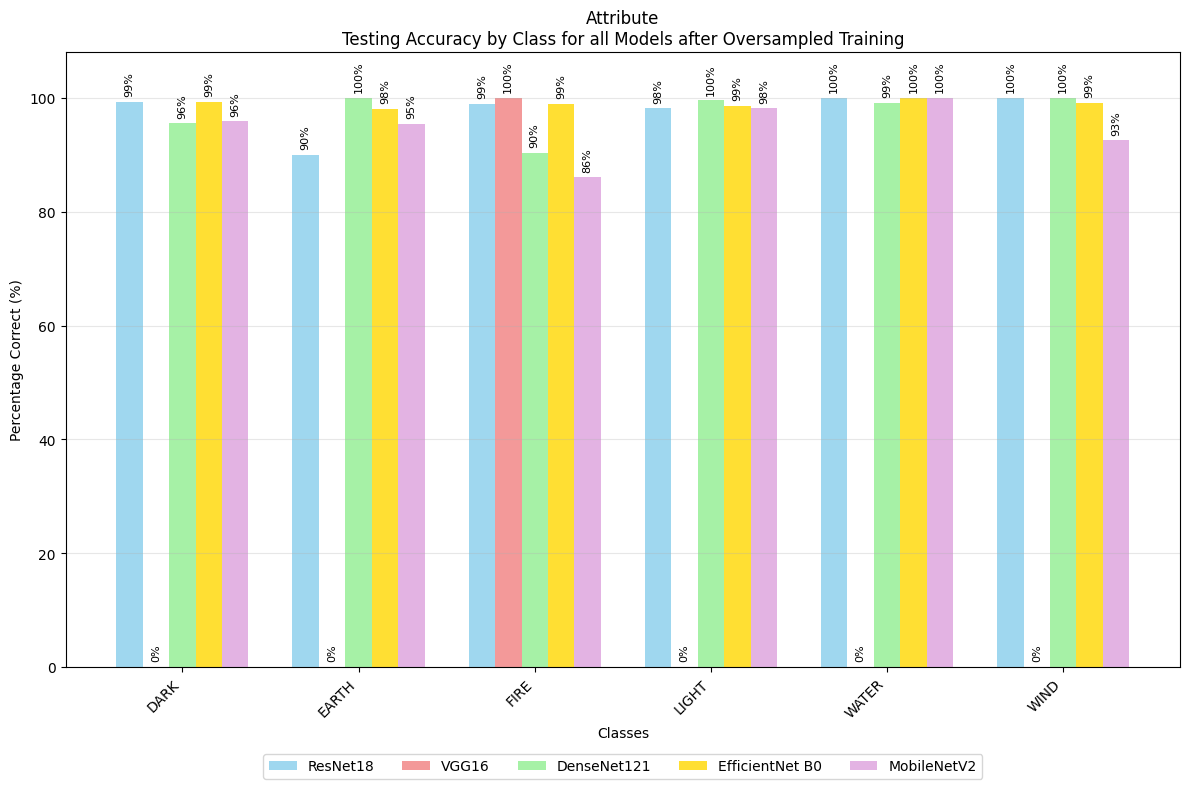

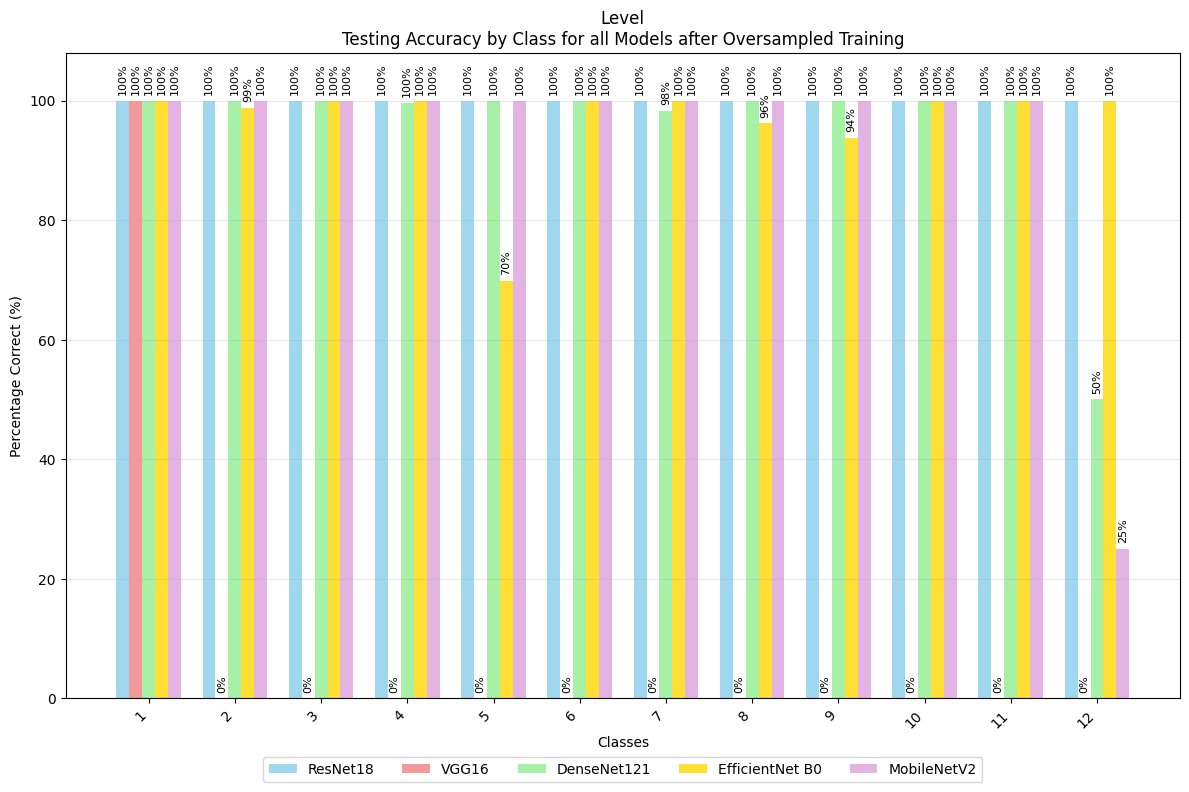

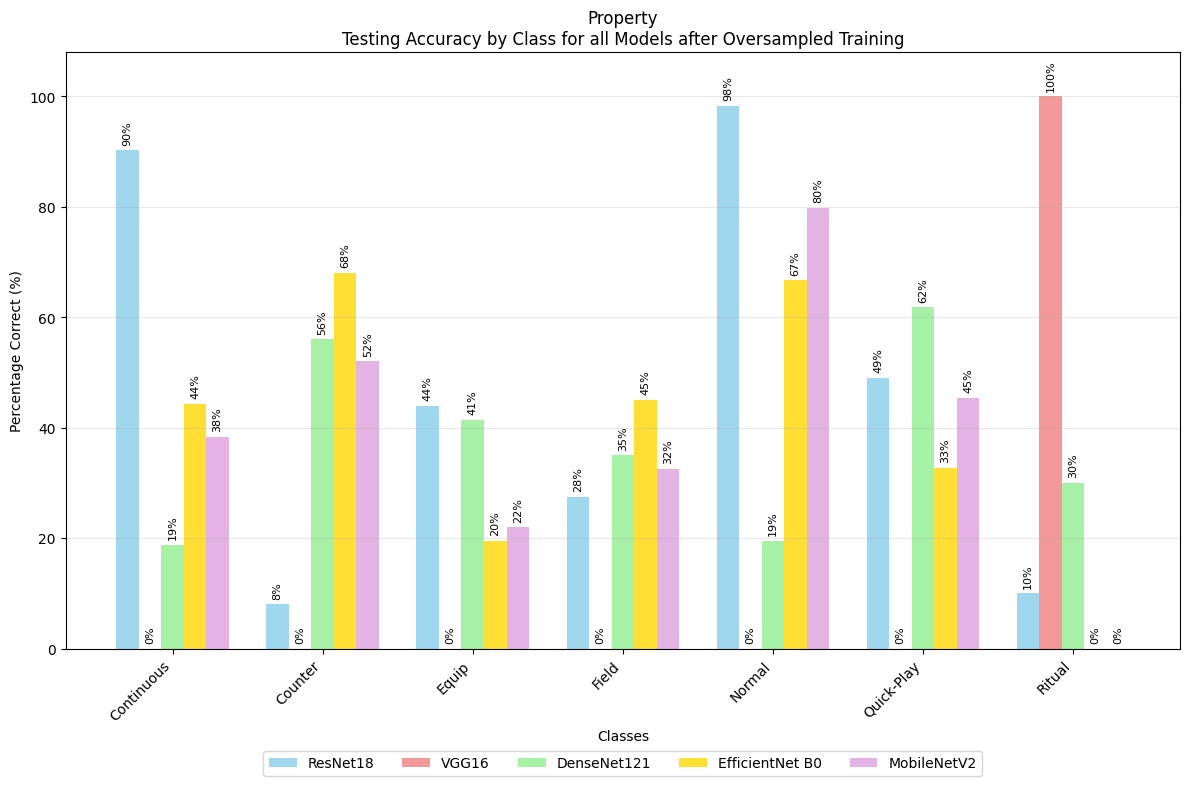

In [18]:
# Load the data for correct predictions and total samples
with open("oversample_results/all_classes_correct_oversample.json", "r") as file:
    all_classes_correct = json.load(file)

with open("oversample_results/all_classes_total_oversample.json", "r") as file:
    all_classes_total = json.load(file)

with open("oversample_results/all_classes_oversample.json", "r") as file:
    all_classes_names = json.load(file)

# Define the features and models
features = ["_CardCategory", "_Attribute", "_Level", "_Property"]
models = ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]
legend_offsets = {"_CardCategory": -0.245, "_Attribute": -0.13, "_Level": -0.08, "_Property": -0.16}
models_nice2 = {"resnet18": "ResNet18", "vgg16": "VGG16", "densenet121": "DenseNet121", "efficientnet_b0": "EfficientNet B0", "mobilenet_v2": "MobileNetV2"}

# Create bar graphs for each feature
for feature in features:
    # Get class names for this feature
    class_names = all_classes_names[f"resnet18{feature}"]

    if feature == "_Level":
        for i in range(len(class_names)):
            class_names[i] = str(class_names[i])[:-2]
    
    # Calculate percentages for each model and class
    percentages = {}
    for model in models:
        correct = all_classes_correct[f"{model}{feature}"]
        total = all_classes_total[f"{model}{feature}"]
        percentages[model] = [(c/t)*100 if t > 0 else 0 for c, t in zip(correct, total)]
    
    # Create the bar graph
    fig, ax = plt.subplots(figsize=(12, 8))
    
    x = np.arange(len(class_names))
    width = 0.15
    
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']
    
    for i, model in enumerate(models):
        bars = ax.bar(x + i*width, percentages[model], width, 
                     label=models_nice2[model], color=colors[i], alpha=0.8)
        
        # Add percentage labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
    ax.set_xlabel('Classes')
    ax.set_ylabel('Percentage Correct (%)')

    title_feature = feature
    if feature == "_CardCategory":
        title_feature = " Card Type"

    ax.set_title(f'{title_feature[1:]}\nTesting Accuracy by Class for all Models after Oversampled Training')
    ax.set_xticks(x + width * 2)
    ax.set_xticklabels(class_names, rotation=45, ha='right')
    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, legend_offsets[feature]), ncol=5)
    ax.set_ylim(0, 108)
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'figs/per_class/{feature[1:]}_oversample.svg', dpi=300, bbox_inches='tight')
    plt.savefig(f'../Paper/images/figs/per_class/{feature[1:]}_oversample.pdf', dpi=300, bbox_inches='tight')
    plt.show()

### For each model and feature compare oversample and normal for each class

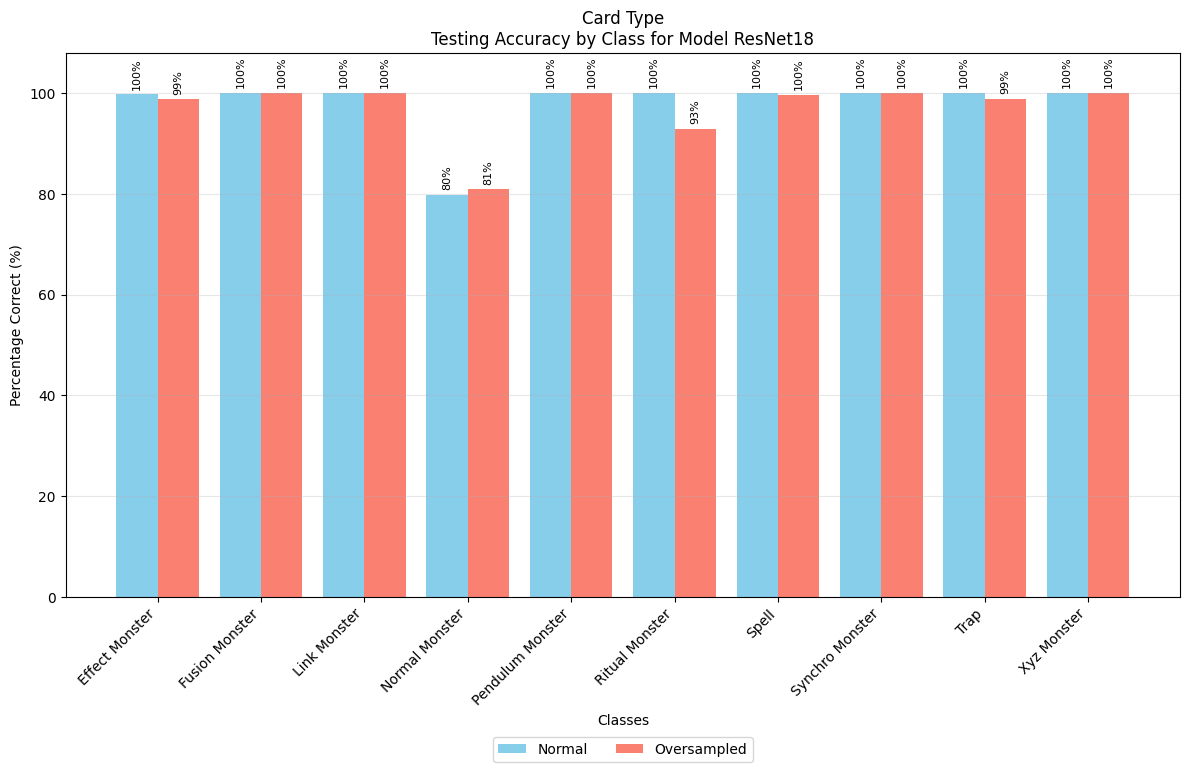

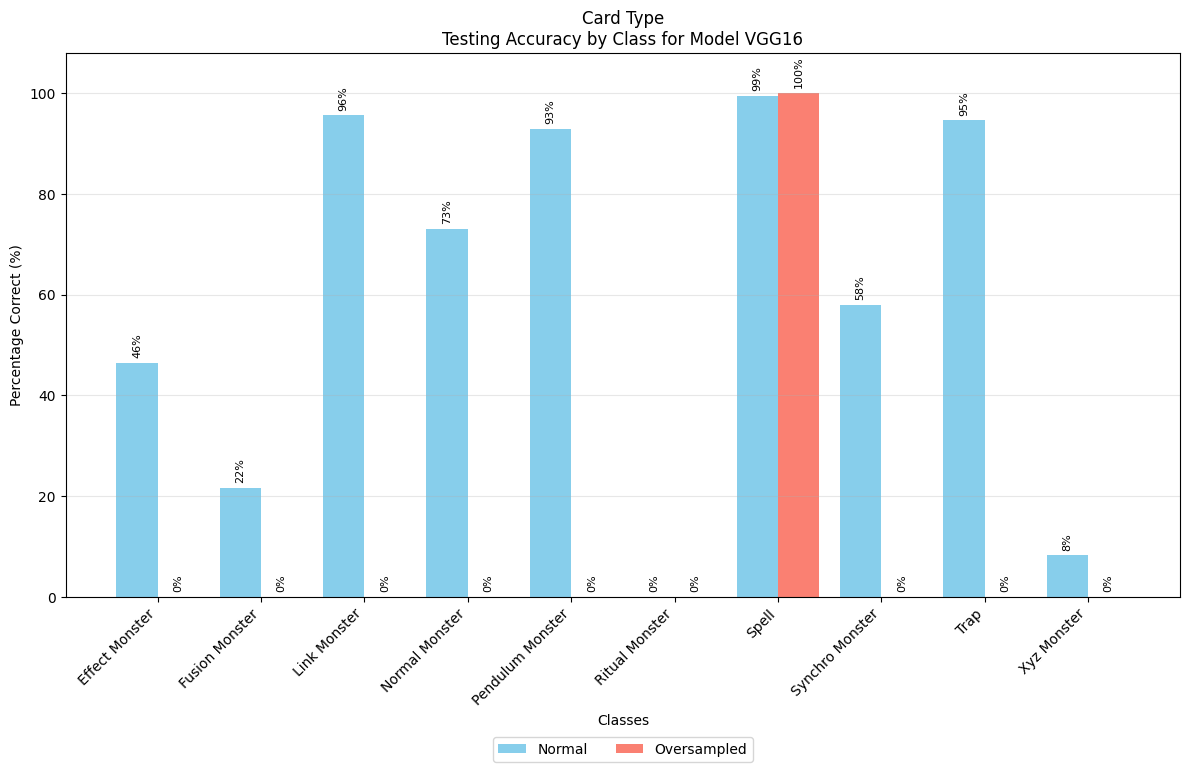

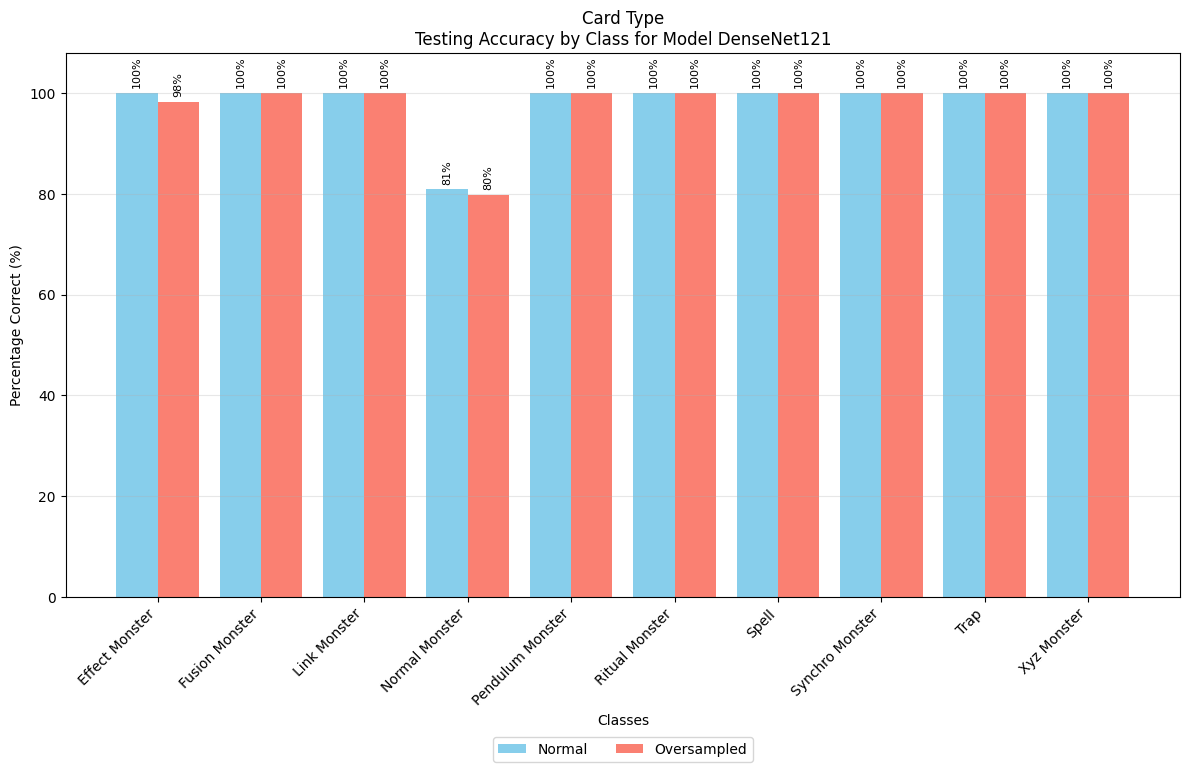

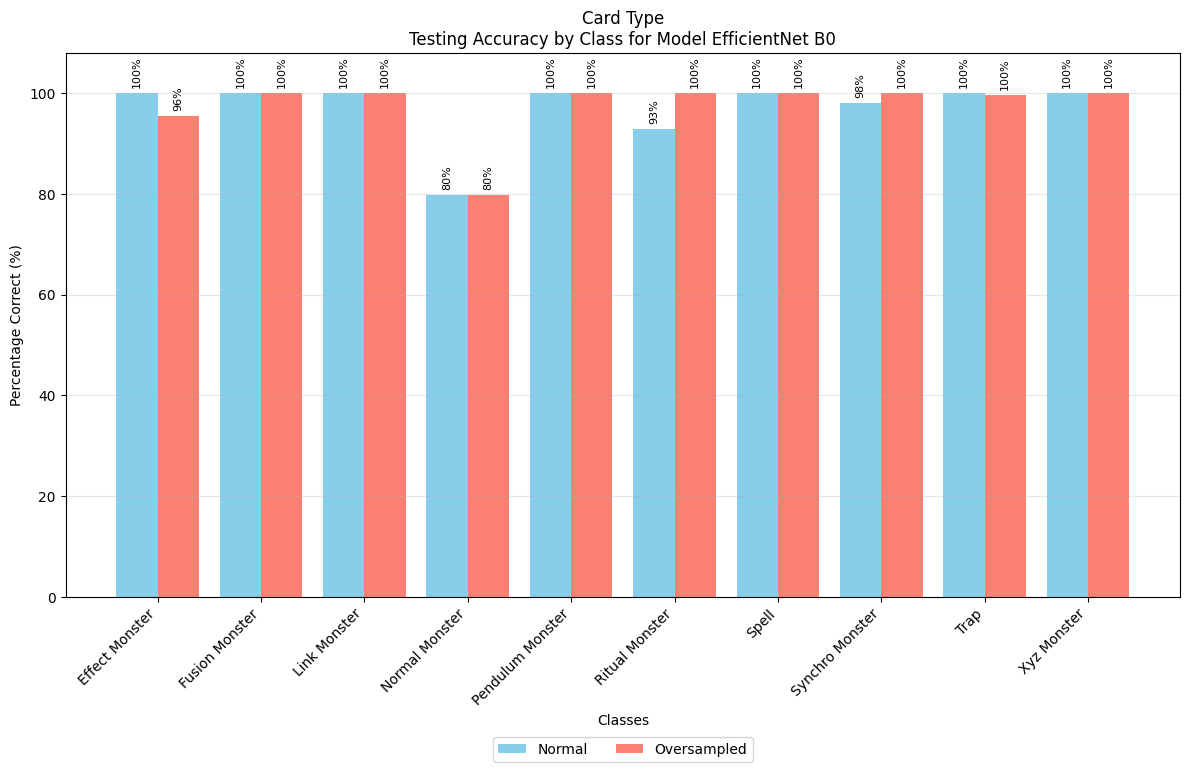

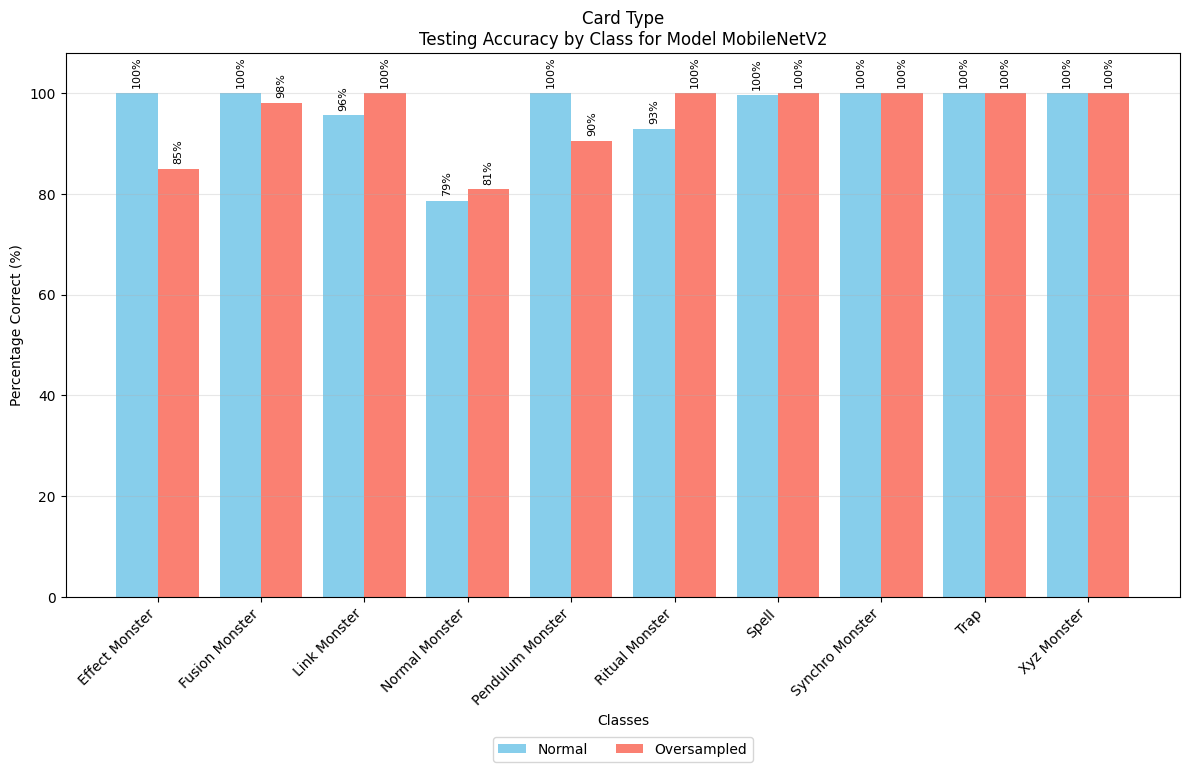

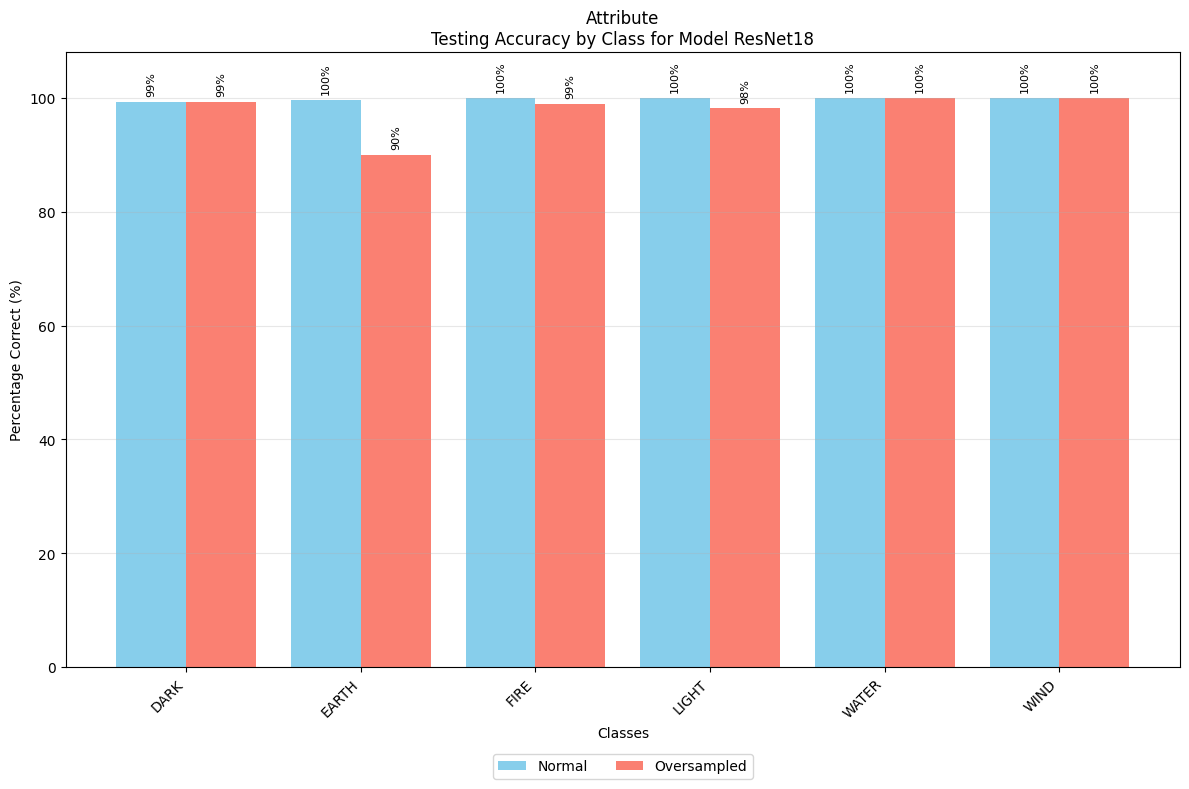

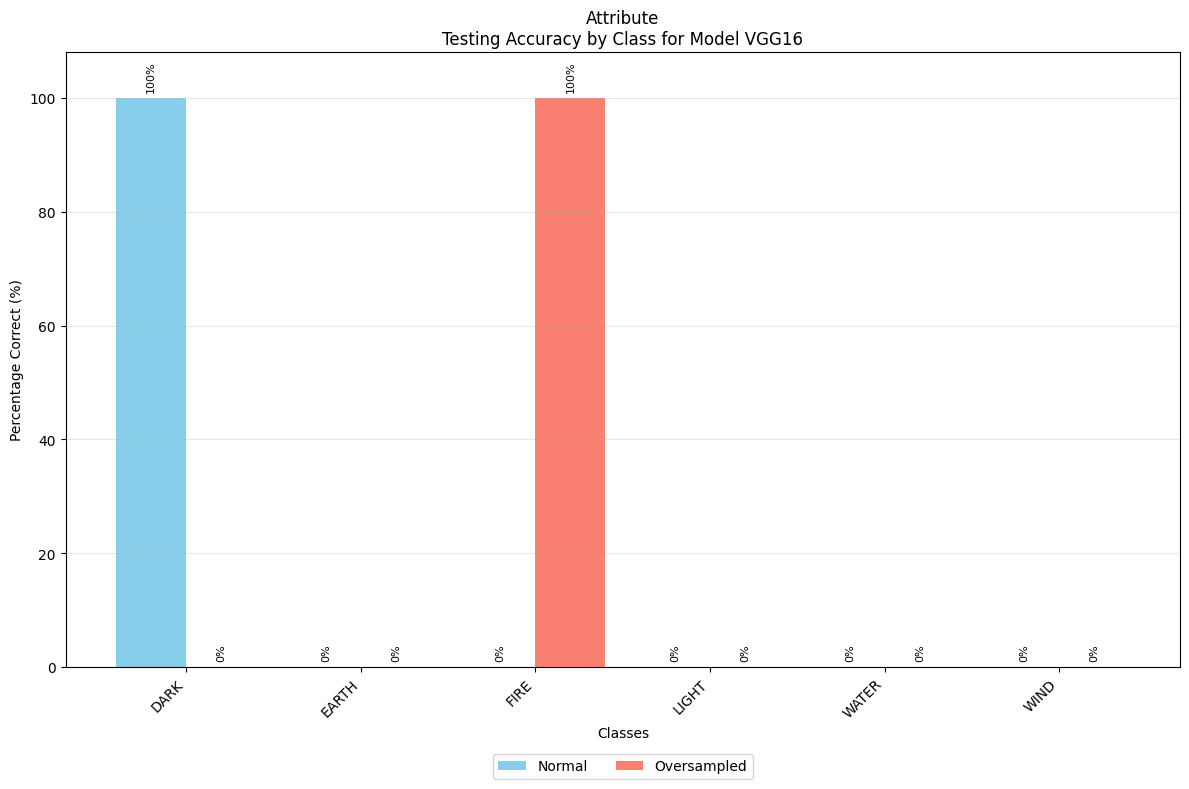

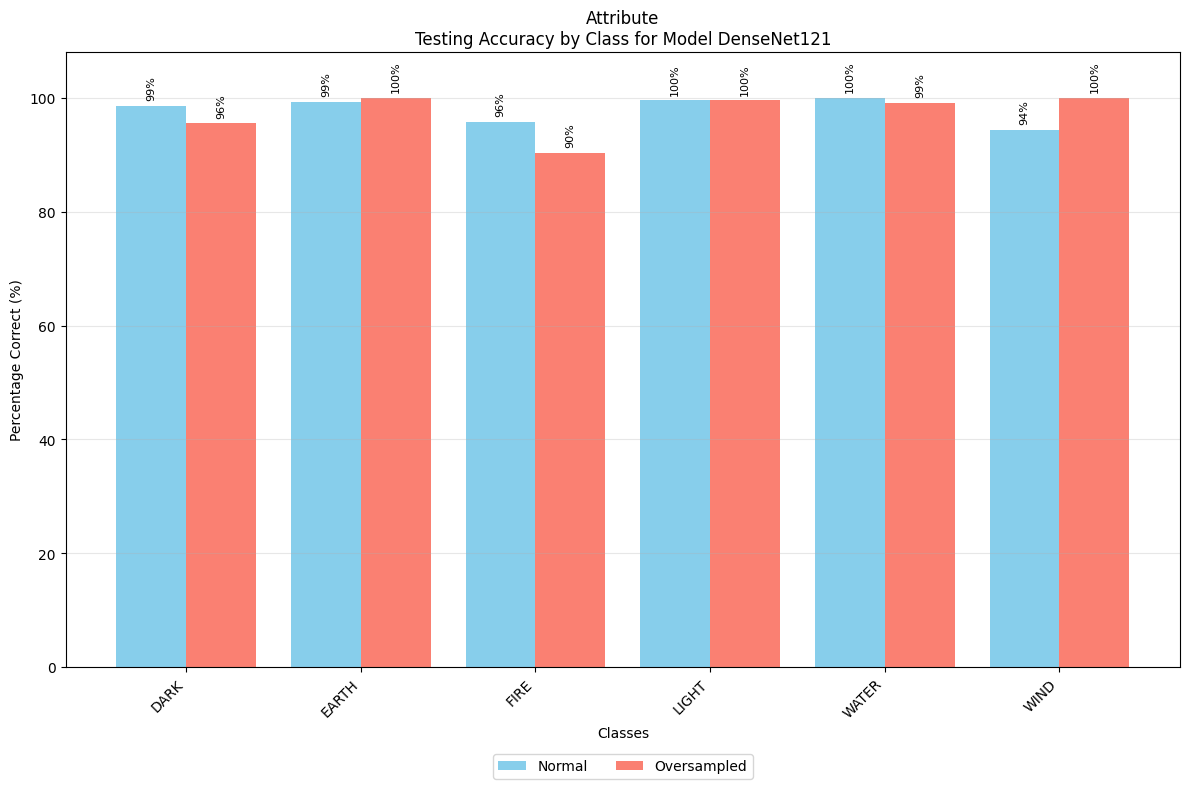

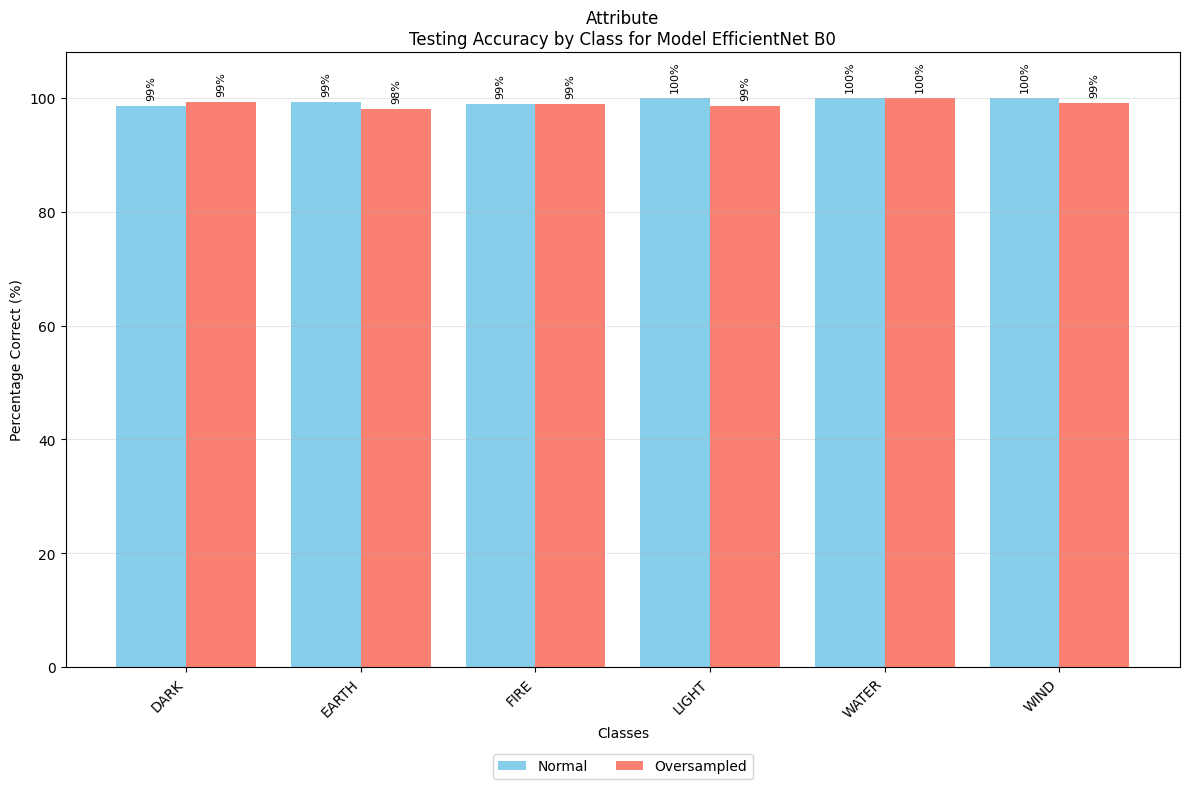

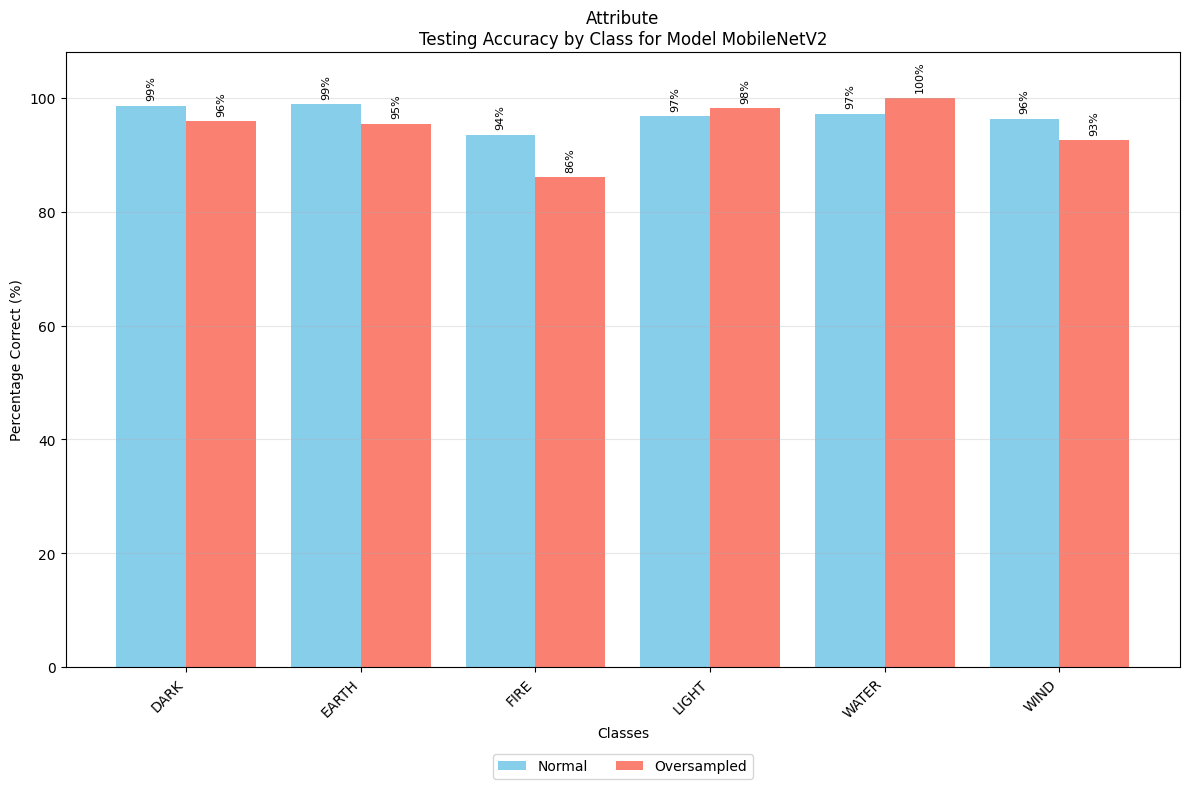

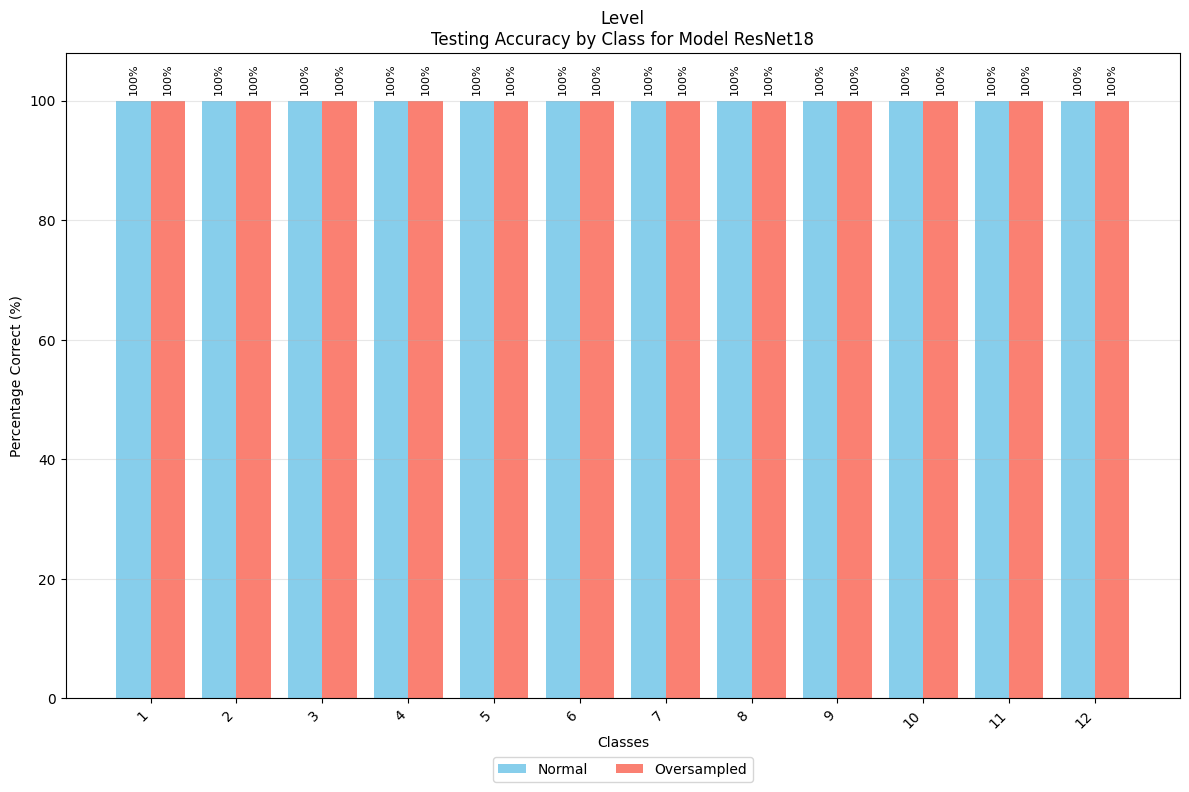

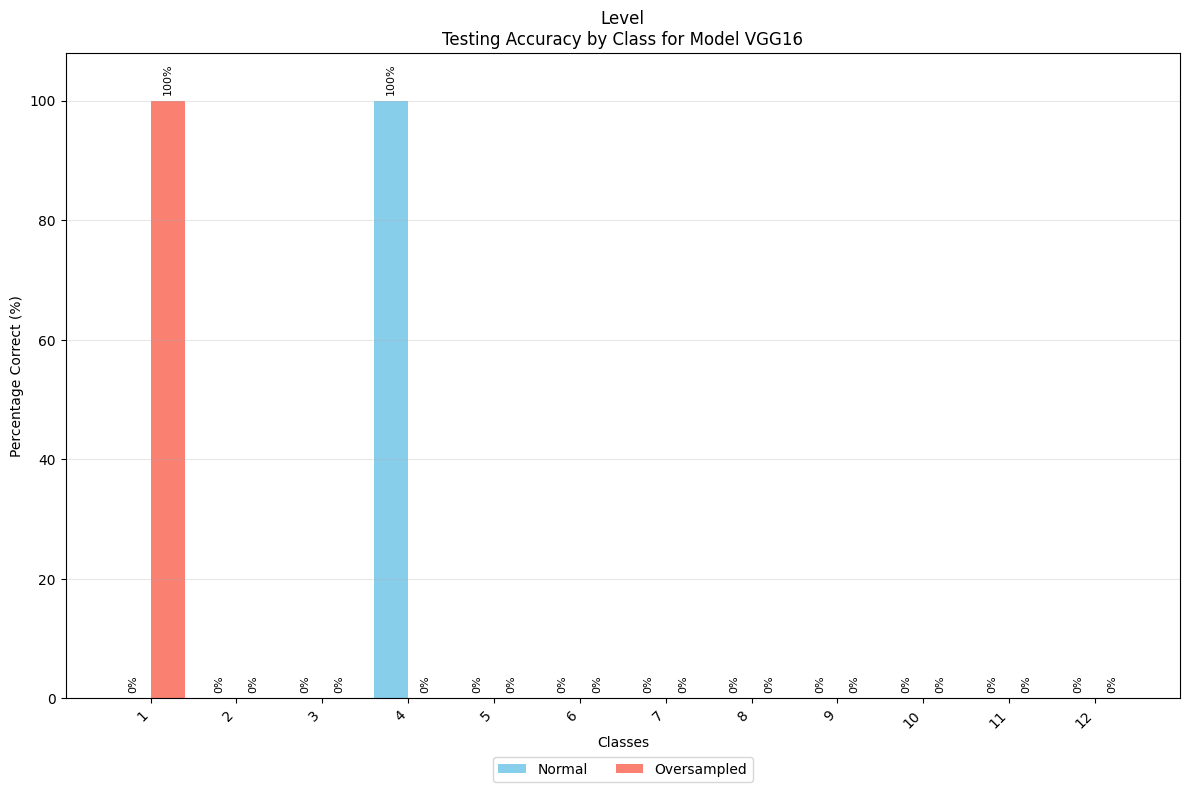

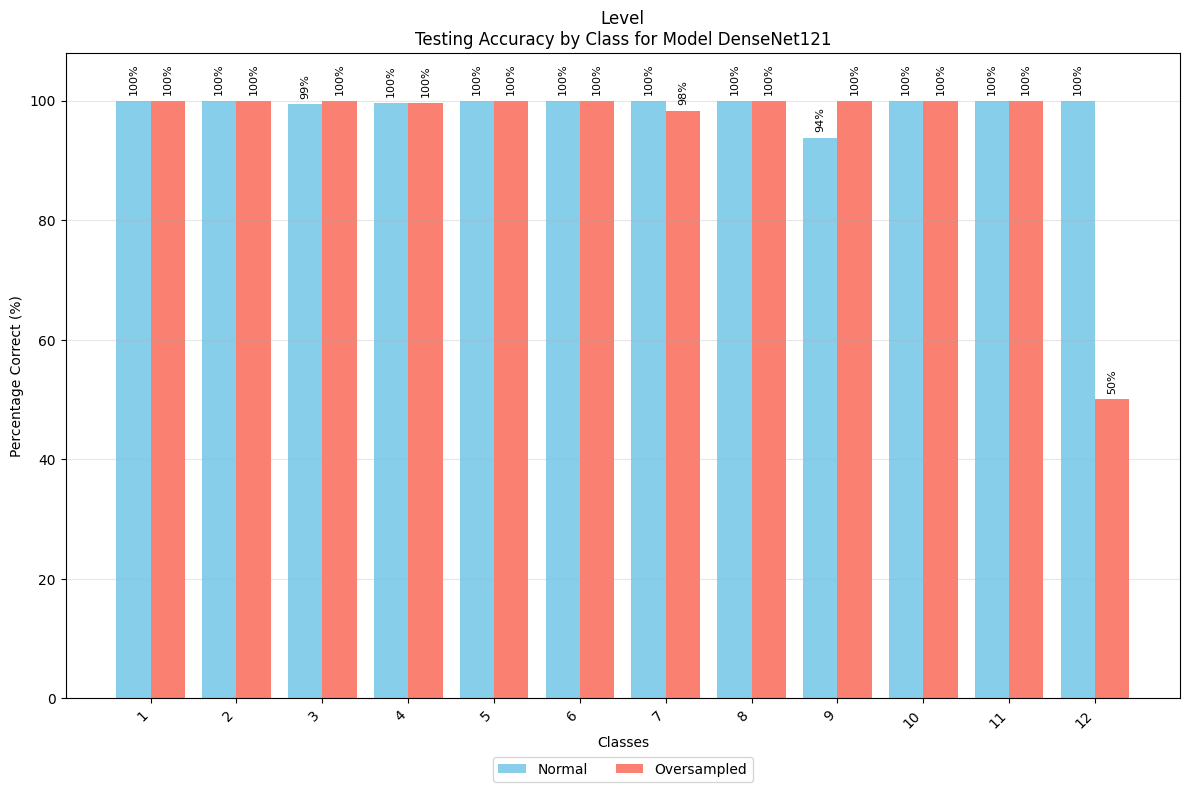

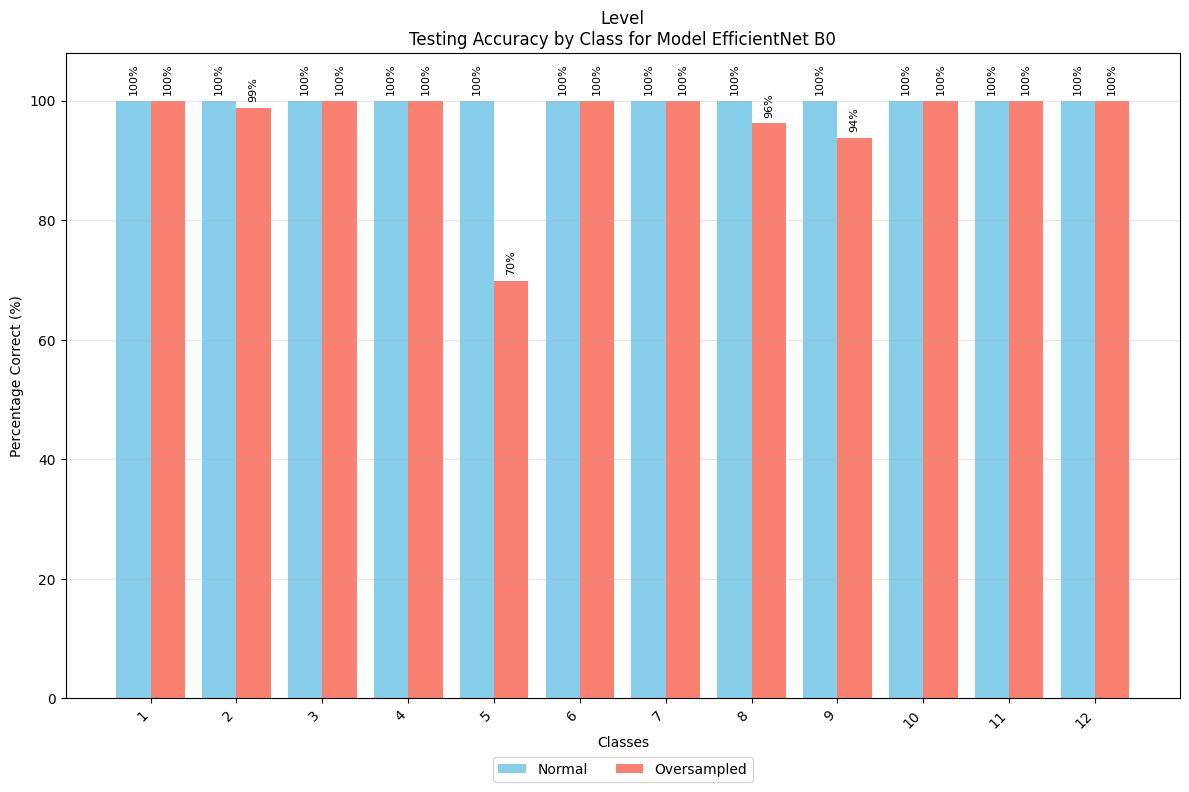

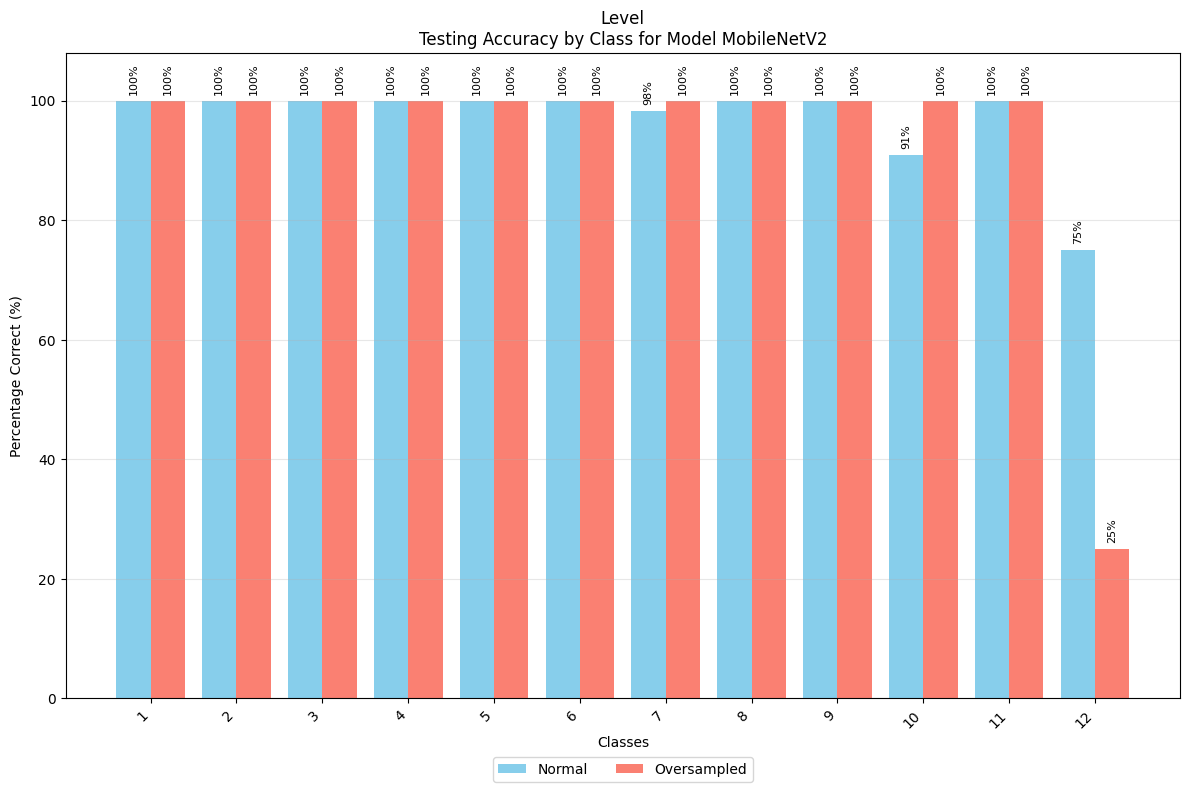

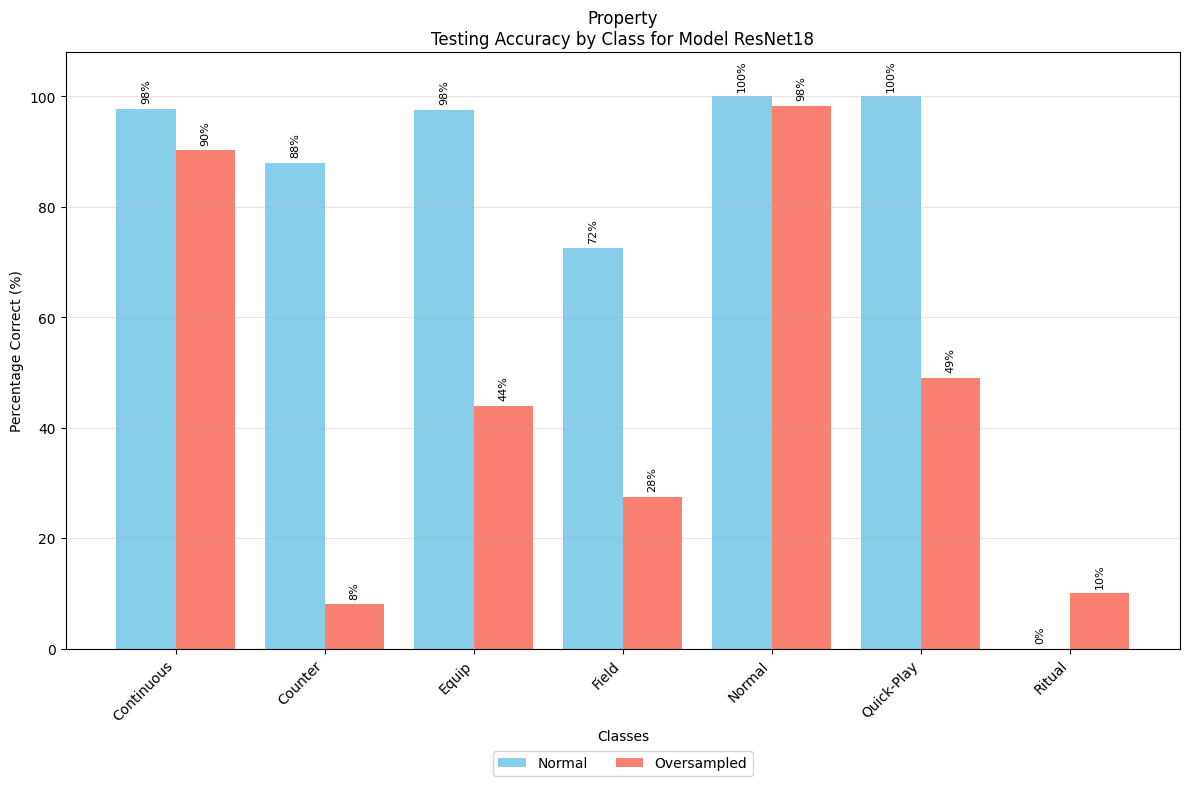

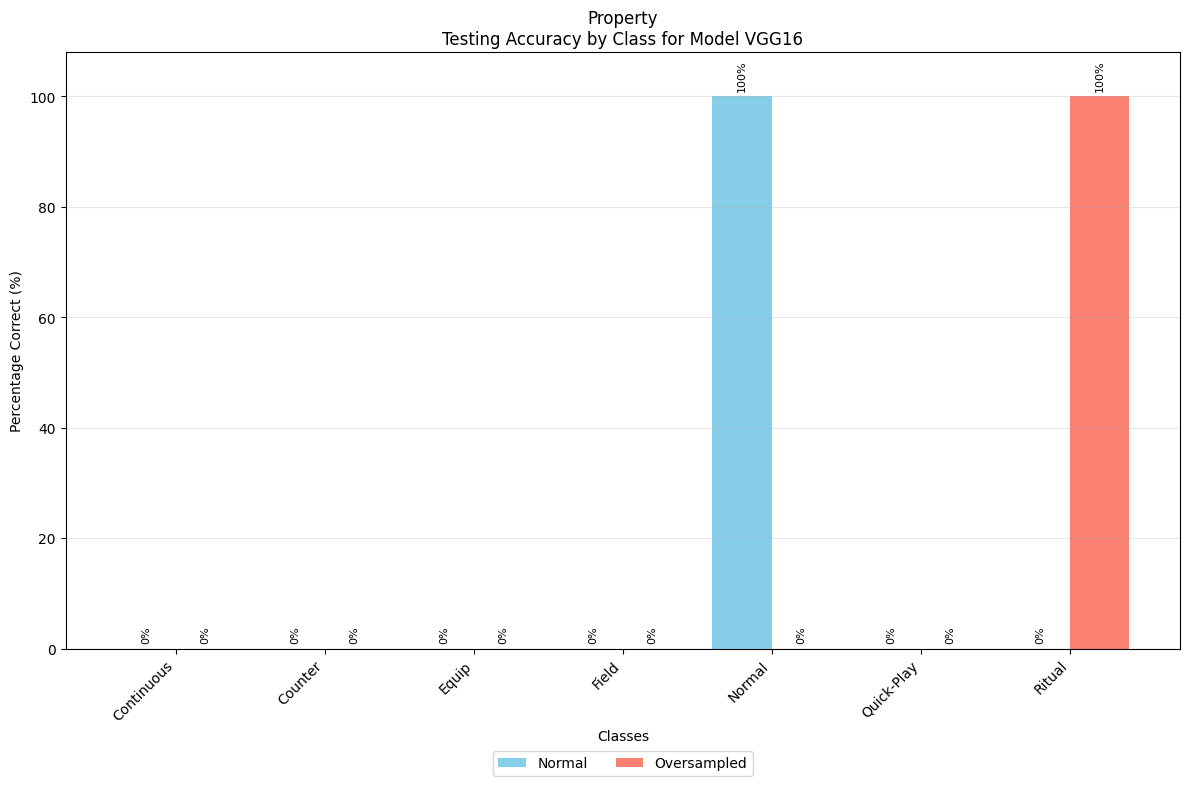

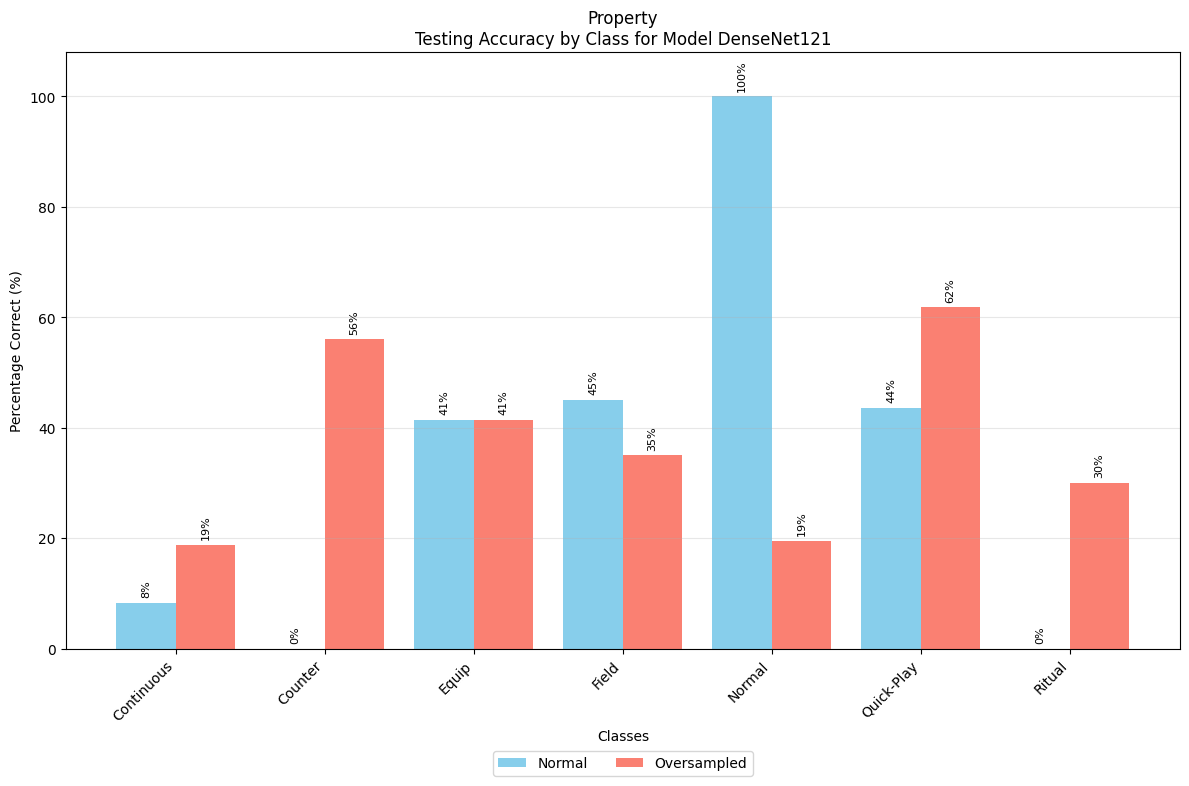

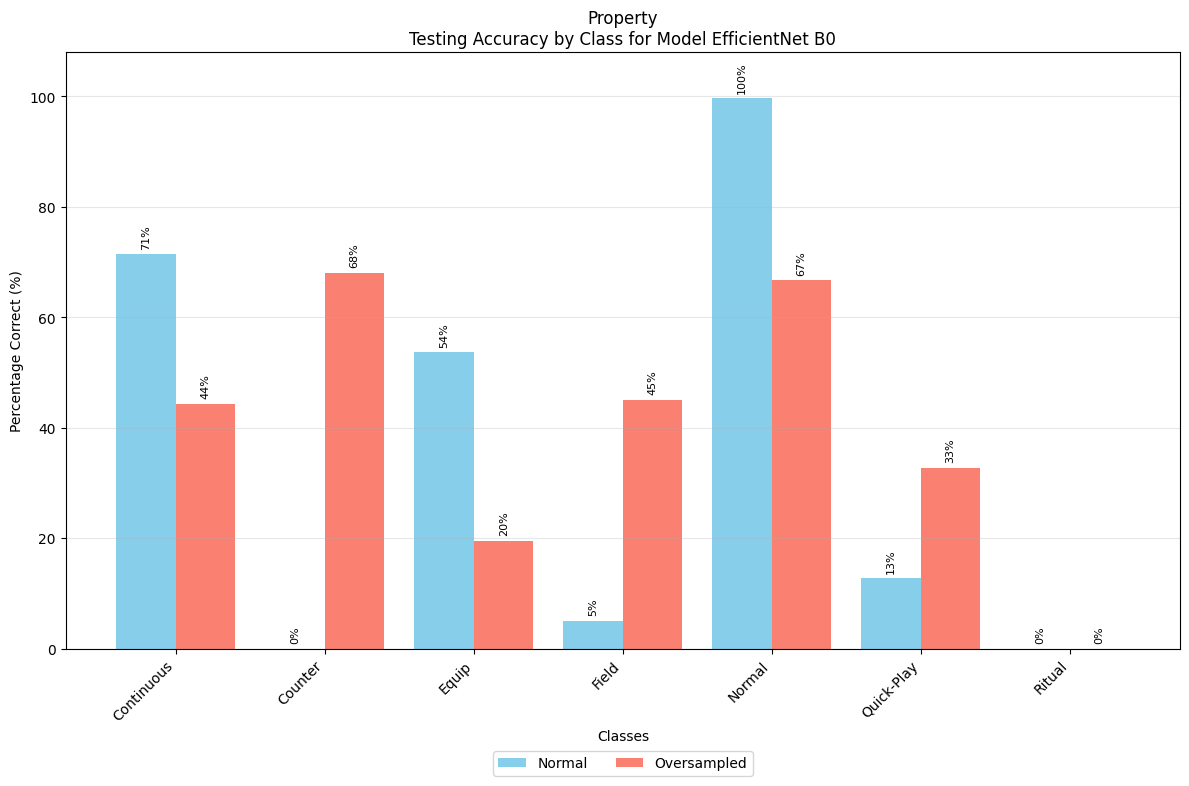

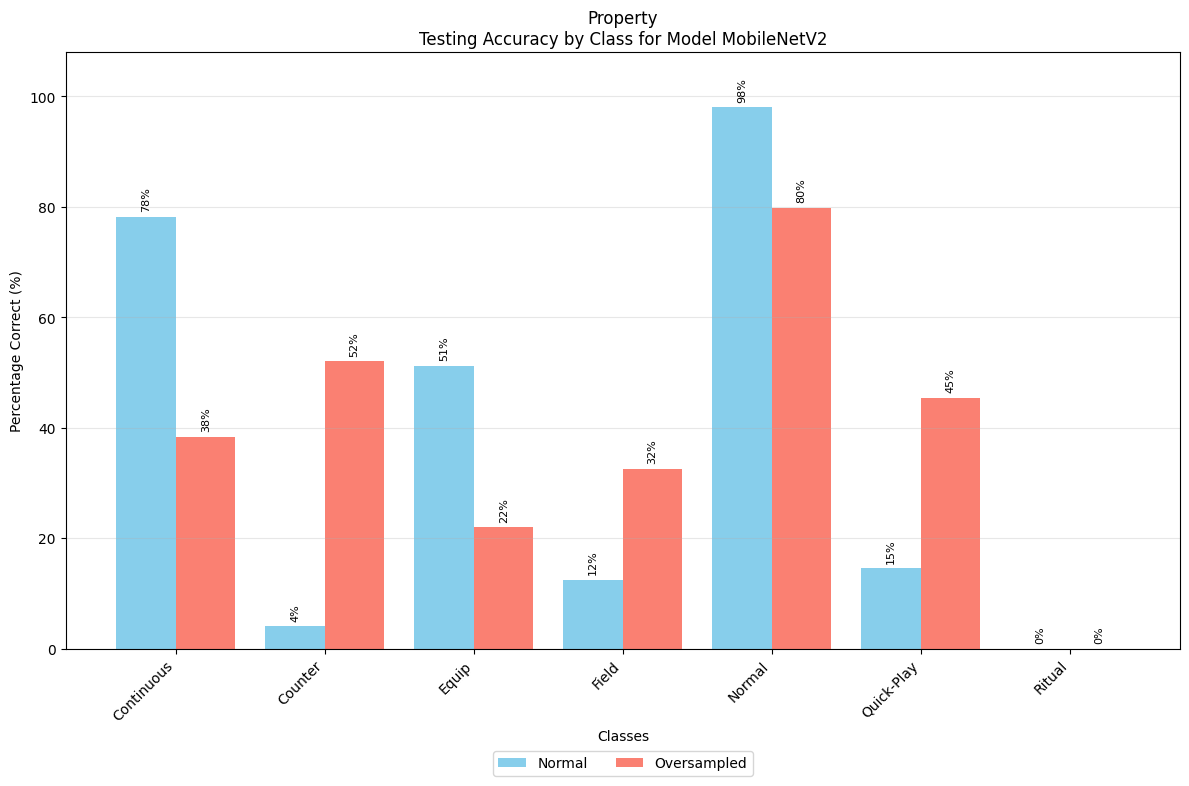

In [19]:
# Load the data for correct predictions and total samples
with open("normal_results/all_classes_correct_normal.json", "r") as file:
    all_classes_correct_normal = json.load(file)

with open("normal_results/all_classes_total_normal.json", "r") as file:
    all_classes_total_normal = json.load(file)

with open("normal_results/all_classes_normal.json", "r") as file:
    all_classes_names_normal = json.load(file)

with open("oversample_results/all_classes_correct_oversample.json", "r") as file:
    all_classes_correct_oversample = json.load(file)

with open("oversample_results/all_classes_total_oversample.json", "r") as file:
    all_classes_total_oversample = json.load(file)

with open("oversample_results/all_classes_oversample.json", "r") as file:
    all_classes_names_oversample = json.load(file)


features = ["_CardCategory", "_Attribute", "_Level", "_Property"]
models = ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]
legend_offsets = {"_CardCategory": -0.245, "_Attribute": -0.13, "_Level": -0.08, "_Property": -0.16}
models_nice2 = {"resnet18": "ResNet18", "vgg16": "VGG16", "densenet121": "DenseNet121", "efficientnet_b0": "EfficientNet B0", "mobilenet_v2": "MobileNetV2"}

for feature in features:
    class_names = all_classes_names_normal[f"resnet18{feature}"]
    if feature == "_Level":
        for i in range(len(class_names)):
            class_names[i] = str(class_names[i])[:-2]
    for model in models:
        correct_normal = all_classes_correct_normal[f"{model}{feature}"]
        total_normal = all_classes_total_normal[f"{model}{feature}"]
        percentages_normal = [(c/t)*100 if t > 0 else 0 for c, t in zip(correct_normal, total_normal)]

        correct_oversample = all_classes_correct_oversample[f"{model}{feature}"]
        total_oversample = all_classes_total_oversample[f"{model}{feature}"]
        percentages_oversample= [(c/t)*100 if t > 0 else 0 for c, t in zip(correct_oversample, total_oversample)]
        # Create the bar graph
        fig, ax = plt.subplots(figsize=(12, 8))
        
        x = np.arange(len(class_names))
        width = 0.4
        bars = ax.bar(x + 1.5*width, percentages_normal, width, 
                     label='Normal', color='skyblue')
        
        # Add percentage labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
            
        bars = ax.bar(x + 2.5*width, percentages_oversample, width, 
                     label='Oversampled', color='salmon')
        
        # Add percentage labels on bars
        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.0f}%', ha='center', va='bottom', fontsize=8, rotation=90)
    
        ax.set_xlabel('Classes')
        ax.set_ylabel('Percentage Correct (%)')
        
        # Format feature name for title
        title_feature = feature
        if feature == "_CardCategory":
            title_feature = " Card Type"

        ax.set_title(f'{title_feature[1:]}\nTesting Accuracy by Class for Model {models_nice2[model]}')
        ax.set_xticks(x + width * 2)
        ax.set_xticklabels(class_names, rotation=45, ha='right')
        #ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, legend_offsets[feature]), ncol=2)
        ax.set_ylim(0, 108)
        ax.grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'figs/per_class_per_model/{title_feature[1:]}_{model}_over_normal.svg', dpi=300, bbox_inches='tight')
        plt.savefig(f'../Paper/images/figs/per_class_per_model/{title_feature[1:]}_{model}_over_normal.pdf', dpi=300, bbox_inches='tight')
        plt.show()


In [20]:
# Load both JSONs
with open("./normal_results/all_missclassifications_normal.json", "r") as f:
    normal_data = json.load(f)

with open("./oversample_results/all_missclassifications_oversample.json", "r") as f:
    oversample_data = json.load(f)


# Extract models and classification types
models = ["resnet18", "vgg16", "densenet121", "efficientnet_b0", "mobilenet_v2"]
models_nice = ["ResNet18", "VGG16", "DenseNet121", "EfficientNet B0", "MobileNetV2"]
class_types = ["CardCategory", "Level", "Property", "Attribute"]
class_types_nice = ["Card Types", "Levels", "Properties", "Attributes"]


def create_latex_table(model, ctype, mode, data):
    """Generate a LaTeX table string from misclassification data."""
    if mode == "normal":
        title = f"{models_nice[models.index(model)]} on {class_types_nice[class_types.index(ctype)]} with normal training"
    else:
        title = f"{models_nice[models.index(model)]} on {class_types_nice[class_types.index(ctype)]} with oversampled training"
    if not data:
        return f"% No misclassifications for {title}\n"
    
    table = []
    table.append("\\begin{table}[htbp]")
    table.append("\\centering")
    table.append(f"\\caption{{Misclassifications for {title}}}")
    table.append("\\begin{tabular}{l l r}")
    table.append("\\toprule")
    table.append("Actual & Predicted & Count \\\\")
    table.append("\\midrule")

    for k, v in data.items():
        actual, predicted = k.split("_", 1)
        table.append(f"{actual} & {predicted} & {v} \\\\")

    table.append("\\bottomrule")
    table.append("\\label{tab:misclass-" + model + "-" + ctype + "-" + mode + "}")
    table.append("\\end{tabular}")
    table.append("\\end{table}")
    return "\n".join(table)

# Generate tables
for model in models:
    for ctype in class_types:
        for mode, dataset in [("normal", normal_data), ("oversample", oversample_data)]:
            key = f"{model}_{ctype}"
            data = dataset.get(key, {})
            latex_code = create_latex_table(model, ctype, mode, data)

            filename =f"./latex_tables/{model}_{ctype}_{mode}.tex"
            with open(filename, "w") as f:
                f.write(latex_code)
            filename =f"../Paper/tables/missclassifications/{model}_{ctype}_{mode}.tex"
            with open(filename, "w") as f:
                f.write(latex_code)

print("Tables generated")


Tables generated
